In [1]:
from BorderModel import BorderData, clean_df_subset
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from dbhelper import pd_query

In [2]:
query = '''
        select 
            c.date,
            waittime,
            year,
            month,
            dayofmonth,
            week,
            dayofweek,
            minofday,
            labor,
            newyears,
            us_mlk,
            us_washington,
            us_memorial,
            us_independence,
            us_columbus,
            us_veterans,
            us_thanksgiving,
            xmas,
            ca_goodfriday,
            ca_victoria,
            ca_canada,
            ca_civic,
            ca_thanksgiving,
            mothers,
            ca_family
        from mungedata c
        join datefeatures d on c.date = d.date
        left join publicholiday h on c.date::timestamp::date = h.date
        where
            crossing_id = 1
            and munger_id = 2
            and (minute = 0 or minute = 30)
        order by c.date;
        '''

df = pd_query(query)

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

## Start with model with zero lead/lag effects

OOB:  0.872992061006
Best score:  0.302687285042
** MSE for last cv fold **
Baseline :  96.7590735774
Model    :  108.170560571
** R^2 for last cv fold **
Baseline :  0.14722281598
Model    :  0.0466487262963
** Explained variance for last cv fold **
Baseline :  0.304333505904
Model    :  0.221976228885


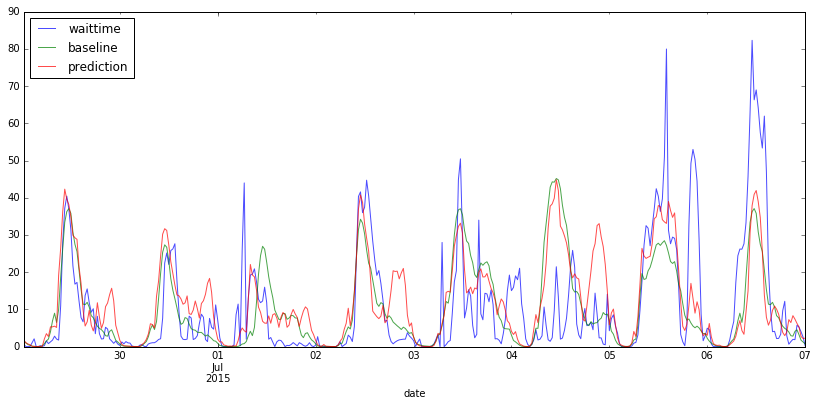

In [5]:
data = BorderData(df)

model = ExtraTreesRegressor(n_jobs=-1, n_estimators=100, bootstrap=True, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)
data.predict(grid)
data.print_metrics(grid)
data.plot('6/29/15', '7/7/15');

## +1, -1
2007 removed

In [22]:
query = '''
        select 
            c.date,
            waittime,
            year,
            month,
            dayofmonth,
            week,
            dayofweek,
            minofday,
            h.labor,
            h.newyears,
            h.us_mlk,
            h.us_washington,
            h.us_memorial,
            h.us_independence,
            h.us_columbus,
            h.us_veterans,
            h.us_thanksgiving,
            h.xmas,
            h.ca_goodfriday,
            h.ca_victoria,
            h.ca_canada,
            h.ca_civic,
            h.ca_thanksgiving,
            h.mothers,
            h.ca_family,
            hp1.labor as labor_p1,
            hp1.newyears as newyears_p1,
            hp1.us_mlk as us_mlk_p1,
            hp1.us_washington as us_washington_p1,
            hp1.us_memorial as us_memorial_p1,
            hp1.us_independence as us_independence_p1,
            hp1.us_columbus as us_columbus_p1,
            hp1.us_veterans as us_veterans_p1,
            hp1.us_thanksgiving as us_thanksgiving_p1,
            hp1.xmas as xmas_p1,
            hp1.ca_goodfriday as ca_goodfriday_p1,
            hp1.ca_victoria as ca_victoria_p1,
            hp1.ca_canada as ca_canada_p1,
            hp1.ca_civic as ca_civic_p1,
            hp1.ca_thanksgiving as ca_thanksgiving_p1,
            hp1.mothers as mothers_p1,
            hp1.ca_family as ca_family_p1,
            hm1.labor as labor_m1,
            hm1.newyears as newyears_m1,
            hm1.us_mlk as us_mlk_m1,
            hm1.us_washington as us_washington_m1,
            hm1.us_memorial as us_memorial_m1,
            hm1.us_independence as us_independence_m1,
            hm1.us_columbus as us_columbus_m1,
            hm1.us_veterans as us_veterans_m1,
            hm1.us_thanksgiving as us_thanksgiving_m1,
            hm1.xmas as xmas_m1,
            hm1.ca_goodfriday as ca_goodfriday_m1,
            hm1.ca_victoria as ca_victoria_m1,
            hm1.ca_canada as ca_canada_m1,
            hm1.ca_civic as ca_civic_m1,
            hm1.ca_thanksgiving as ca_thanksgiving_m1,
            hm1.mothers as mothers_m1,
            hm1.ca_family as ca_family_m1
        from mungedata c
        join datefeatures d on c.date = d.date
        left join publicholiday h on c.date::timestamp::date = h.date
        left join publicholiday hp1 on c.date::timestamp::date = hp1.date - interval '1 day'
        left join publicholiday hm1 on c.date::timestamp::date = hm1.date + interval '1 day'
        where
            crossing_id = 1
            and c.date >= '2008-1-1'
            and munger_id = 2
            and (minute = 0 or minute = 30)
        order by c.date;
        '''

df = pd_query(query)

OOB:  0.877859245211
Best score:  0.278657187633
** MSE for last cv fold **
Baseline :  96.7590735774
Model    :  106.707777249
** R^2 for last cv fold **
Baseline :  0.14722281598
Model    :  0.0595408323917
** Explained variance for last cv fold **
Baseline :  0.304333505904
Model    :  0.233044914048


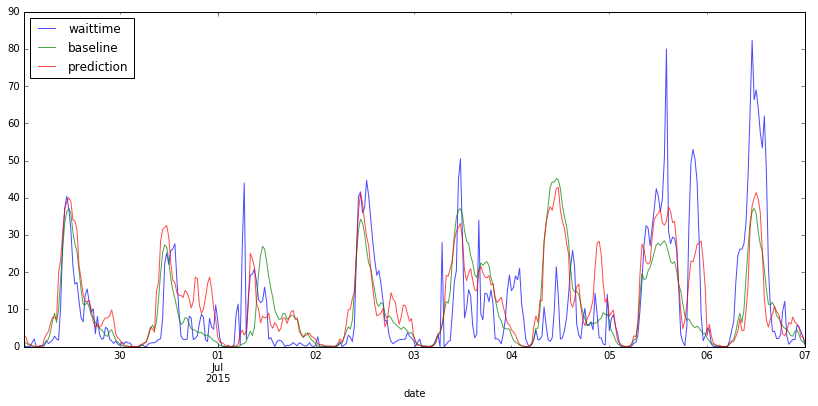

In [23]:
data = BorderData(df)

model = ExtraTreesRegressor(n_jobs=-1, n_estimators=100, bootstrap=True, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)
data.predict(grid)
data.print_metrics(grid)
data.plot('6/29/15', '7/7/15');

# Same, exclude week and dayofmonth
OOB gets worse, but 2015 prediction is better.  Probably good to keep out for now to prevent overfitting.

In [24]:
query = '''
        select 
            c.date,
            waittime,
            year,
            month,
            dayofweek,
            minofday,
            h.labor,
            h.newyears,
            h.us_mlk,
            h.us_washington,
            h.us_memorial,
            h.us_independence,
            h.us_columbus,
            h.us_veterans,
            h.us_thanksgiving,
            h.xmas,
            h.ca_goodfriday,
            h.ca_victoria,
            h.ca_canada,
            h.ca_civic,
            h.ca_thanksgiving,
            h.mothers,
            h.ca_family,
            hp1.labor as labor_p1,
            hp1.newyears as newyears_p1,
            hp1.us_mlk as us_mlk_p1,
            hp1.us_washington as us_washington_p1,
            hp1.us_memorial as us_memorial_p1,
            hp1.us_independence as us_independence_p1,
            hp1.us_columbus as us_columbus_p1,
            hp1.us_veterans as us_veterans_p1,
            hp1.us_thanksgiving as us_thanksgiving_p1,
            hp1.xmas as xmas_p1,
            hp1.ca_goodfriday as ca_goodfriday_p1,
            hp1.ca_victoria as ca_victoria_p1,
            hp1.ca_canada as ca_canada_p1,
            hp1.ca_civic as ca_civic_p1,
            hp1.ca_thanksgiving as ca_thanksgiving_p1,
            hp1.mothers as mothers_p1,
            hp1.ca_family as ca_family_p1,
            hm1.labor as labor_m1,
            hm1.newyears as newyears_m1,
            hm1.us_mlk as us_mlk_m1,
            hm1.us_washington as us_washington_m1,
            hm1.us_memorial as us_memorial_m1,
            hm1.us_independence as us_independence_m1,
            hm1.us_columbus as us_columbus_m1,
            hm1.us_veterans as us_veterans_m1,
            hm1.us_thanksgiving as us_thanksgiving_m1,
            hm1.xmas as xmas_m1,
            hm1.ca_goodfriday as ca_goodfriday_m1,
            hm1.ca_victoria as ca_victoria_m1,
            hm1.ca_canada as ca_canada_m1,
            hm1.ca_civic as ca_civic_m1,
            hm1.ca_thanksgiving as ca_thanksgiving_m1,
            hm1.mothers as mothers_m1,
            hm1.ca_family as ca_family_m1
        from mungedata c
        join datefeatures d on c.date = d.date
        left join publicholiday h on c.date::timestamp::date = h.date
        left join publicholiday hp1 on c.date::timestamp::date = hp1.date - interval '1 day'
        left join publicholiday hm1 on c.date::timestamp::date = hm1.date + interval '1 day'
        where
            crossing_id = 1
            and c.date >= '2008-1-1'
            and munger_id = 2
            and (minute = 0 or minute = 30)
        order by c.date;
        '''

df = pd_query(query)

OOB:  0.639558417513
Best score:  0.299062264683
** MSE for last cv fold **
Baseline :  96.7590735774
Model    :  104.978348995
** R^2 for last cv fold **
Baseline :  0.14722281598
Model    :  0.0747829890382
** Explained variance for last cv fold **
Baseline :  0.304333505904
Model    :  0.241033071582


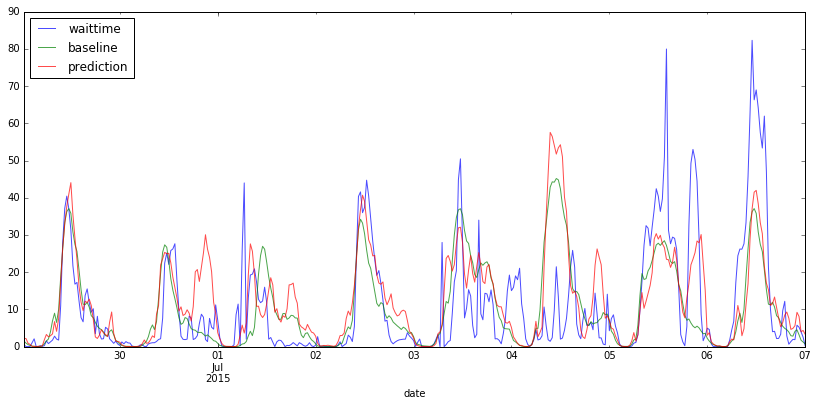

In [25]:
data = BorderData(df)

model = ExtraTreesRegressor(n_jobs=-1, n_estimators=100, bootstrap=True, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)
data.predict(grid)
data.print_metrics(grid)
data.plot('6/29/15', '7/7/15');

## +1,2 -1,2

In [26]:
query = '''
        select 
            c.date,
            waittime,
            year,
            month,
            dayofweek,
            minofday,
            h.labor,
            h.newyears,
            h.us_mlk,
            h.us_washington,
            h.us_memorial,
            h.us_independence,
            h.us_columbus,
            h.us_veterans,
            h.us_thanksgiving,
            h.xmas,
            h.ca_goodfriday,
            h.ca_victoria,
            h.ca_canada,
            h.ca_civic,
            h.ca_thanksgiving,
            h.mothers,
            h.ca_family,
            hp1.labor as labor_p1,
            hp1.newyears as newyears_p1,
            hp1.us_mlk as us_mlk_p1,
            hp1.us_washington as us_washington_p1,
            hp1.us_memorial as us_memorial_p1,
            hp1.us_independence as us_independence_p1,
            hp1.us_columbus as us_columbus_p1,
            hp1.us_veterans as us_veterans_p1,
            hp1.us_thanksgiving as us_thanksgiving_p1,
            hp1.xmas as xmas_p1,
            hp1.ca_goodfriday as ca_goodfriday_p1,
            hp1.ca_victoria as ca_victoria_p1,
            hp1.ca_canada as ca_canada_p1,
            hp1.ca_civic as ca_civic_p1,
            hp1.ca_thanksgiving as ca_thanksgiving_p1,
            hp1.mothers as mothers_p1,
            hp1.ca_family as ca_family_p1,
            hm1.labor as labor_m1,
            hm1.newyears as newyears_m1,
            hm1.us_mlk as us_mlk_m1,
            hm1.us_washington as us_washington_m1,
            hm1.us_memorial as us_memorial_m1,
            hm1.us_independence as us_independence_m1,
            hm1.us_columbus as us_columbus_m1,
            hm1.us_veterans as us_veterans_m1,
            hm1.us_thanksgiving as us_thanksgiving_m1,
            hm1.xmas as xmas_m1,
            hm1.ca_goodfriday as ca_goodfriday_m1,
            hm1.ca_victoria as ca_victoria_m1,
            hm1.ca_canada as ca_canada_m1,
            hm1.ca_civic as ca_civic_m1,
            hm1.ca_thanksgiving as ca_thanksgiving_m1,
            hm1.mothers as mothers_m1,
            hm1.ca_family as ca_family_m1,
            hp2.labor as labor_p2,
            hp2.newyears as newyears_p2,
            hp2.us_mlk as us_mlk_p2,
            hp2.us_washington as us_washington_p2,
            hp2.us_memorial as us_memorial_p2,
            hp2.us_independence as us_independence_p2,
            hp2.us_columbus as us_columbus_p2,
            hp2.us_veterans as us_veterans_p2,
            hp2.us_thanksgiving as us_thanksgiving_p2,
            hp2.xmas as xmas_p2,
            hp2.ca_goodfriday as ca_goodfriday_p2,
            hp2.ca_victoria as ca_victoria_p2,
            hp2.ca_canada as ca_canada_p2,
            hp2.ca_civic as ca_civic_p2,
            hp2.ca_thanksgiving as ca_thanksgiving_p2,
            hp2.mothers as mothers_p2,
            hp2.ca_family as ca_family_p2,
            hm2.labor as labor_m2,
            hm2.newyears as newyears_m2,
            hm2.us_mlk as us_mlk_m2,
            hm2.us_washington as us_washington_m2,
            hm2.us_memorial as us_memorial_m2,
            hm2.us_independence as us_independence_m2,
            hm2.us_columbus as us_columbus_m2,
            hm2.us_veterans as us_veterans_m2,
            hm2.us_thanksgiving as us_thanksgiving_m2,
            hm2.xmas as xmas_m2,
            hm2.ca_goodfriday as ca_goodfriday_m2,
            hm2.ca_victoria as ca_victoria_m2,
            hm2.ca_canada as ca_canada_m2,
            hm2.ca_civic as ca_civic_m2,
            hm2.ca_thanksgiving as ca_thanksgiving_m2,
            hm2.mothers as mothers_m2,
            hm2.ca_family as ca_family_m2
        from mungedata c
        join datefeatures d on c.date = d.date
        left join publicholiday h on c.date::timestamp::date = h.date
        left join publicholiday hp1 on c.date::timestamp::date = hp1.date - interval '1 day'
        left join publicholiday hm1 on c.date::timestamp::date = hm1.date + interval '1 day'
        left join publicholiday hp2 on c.date::timestamp::date = hp2.date - interval '1 day'
        left join publicholiday hm2 on c.date::timestamp::date = hm2.date + interval '1 day'
        where
            crossing_id = 1
            and c.date >= '2008-1-1'
            and munger_id = 2
            and (minute = 0 or minute = 30)
        order by c.date;
        '''

df = pd_query(query)

OOB:  0.638942859877
Best score:  0.311133097471
** MSE for last cv fold **
Baseline :  96.7590735774
Model    :  104.834230642
** R^2 for last cv fold **
Baseline :  0.14722281598
Model    :  0.076053162863
** Explained variance for last cv fold **
Baseline :  0.304333505904
Model    :  0.242221403503


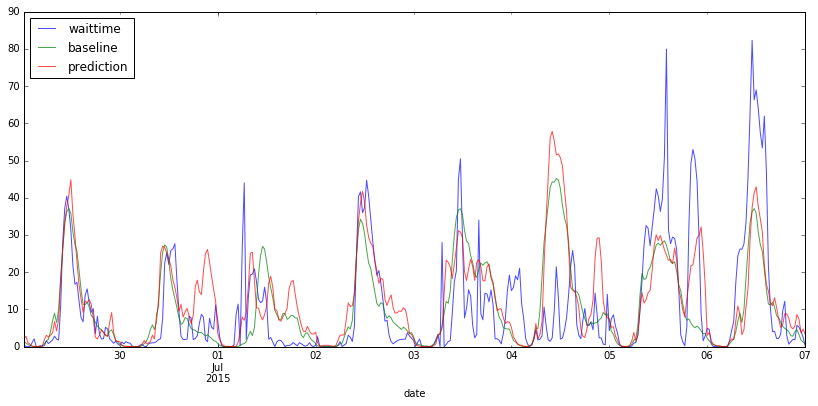

In [27]:
data = BorderData(df)

model = ExtraTreesRegressor(n_jobs=-1, n_estimators=100, bootstrap=True, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)
data.predict(grid)
data.print_metrics(grid)
data.plot('6/29/15', '7/7/15');

## +1,2,3 -1,2,3

In [28]:
query = '''
        select 
            c.date,
            waittime,
            year,
            month,
            dayofweek,
            minofday,
            h.labor,
            h.newyears,
            h.us_mlk,
            h.us_washington,
            h.us_memorial,
            h.us_independence,
            h.us_columbus,
            h.us_veterans,
            h.us_thanksgiving,
            h.xmas,
            h.ca_goodfriday,
            h.ca_victoria,
            h.ca_canada,
            h.ca_civic,
            h.ca_thanksgiving,
            h.mothers,
            h.ca_family,
            hp1.labor as labor_p1,
            hp1.newyears as newyears_p1,
            hp1.us_mlk as us_mlk_p1,
            hp1.us_washington as us_washington_p1,
            hp1.us_memorial as us_memorial_p1,
            hp1.us_independence as us_independence_p1,
            hp1.us_columbus as us_columbus_p1,
            hp1.us_veterans as us_veterans_p1,
            hp1.us_thanksgiving as us_thanksgiving_p1,
            hp1.xmas as xmas_p1,
            hp1.ca_goodfriday as ca_goodfriday_p1,
            hp1.ca_victoria as ca_victoria_p1,
            hp1.ca_canada as ca_canada_p1,
            hp1.ca_civic as ca_civic_p1,
            hp1.ca_thanksgiving as ca_thanksgiving_p1,
            hp1.mothers as mothers_p1,
            hp1.ca_family as ca_family_p1,
            hm1.labor as labor_m1,
            hm1.newyears as newyears_m1,
            hm1.us_mlk as us_mlk_m1,
            hm1.us_washington as us_washington_m1,
            hm1.us_memorial as us_memorial_m1,
            hm1.us_independence as us_independence_m1,
            hm1.us_columbus as us_columbus_m1,
            hm1.us_veterans as us_veterans_m1,
            hm1.us_thanksgiving as us_thanksgiving_m1,
            hm1.xmas as xmas_m1,
            hm1.ca_goodfriday as ca_goodfriday_m1,
            hm1.ca_victoria as ca_victoria_m1,
            hm1.ca_canada as ca_canada_m1,
            hm1.ca_civic as ca_civic_m1,
            hm1.ca_thanksgiving as ca_thanksgiving_m1,
            hm1.mothers as mothers_m1,
            hm1.ca_family as ca_family_m1,
            hp2.labor as labor_p2,
            hp2.newyears as newyears_p2,
            hp2.us_mlk as us_mlk_p2,
            hp2.us_washington as us_washington_p2,
            hp2.us_memorial as us_memorial_p2,
            hp2.us_independence as us_independence_p2,
            hp2.us_columbus as us_columbus_p2,
            hp2.us_veterans as us_veterans_p2,
            hp2.us_thanksgiving as us_thanksgiving_p2,
            hp2.xmas as xmas_p2,
            hp2.ca_goodfriday as ca_goodfriday_p2,
            hp2.ca_victoria as ca_victoria_p2,
            hp2.ca_canada as ca_canada_p2,
            hp2.ca_civic as ca_civic_p2,
            hp2.ca_thanksgiving as ca_thanksgiving_p2,
            hp2.mothers as mothers_p2,
            hp2.ca_family as ca_family_p2,
            hm2.labor as labor_m2,
            hm2.newyears as newyears_m2,
            hm2.us_mlk as us_mlk_m2,
            hm2.us_washington as us_washington_m2,
            hm2.us_memorial as us_memorial_m2,
            hm2.us_independence as us_independence_m2,
            hm2.us_columbus as us_columbus_m2,
            hm2.us_veterans as us_veterans_m2,
            hm2.us_thanksgiving as us_thanksgiving_m2,
            hm2.xmas as xmas_m2,
            hm2.ca_goodfriday as ca_goodfriday_m2,
            hm2.ca_victoria as ca_victoria_m2,
            hm2.ca_canada as ca_canada_m2,
            hm2.ca_civic as ca_civic_m2,
            hm2.ca_thanksgiving as ca_thanksgiving_m2,
            hm2.mothers as mothers_m2,
            hm2.ca_family as ca_family_m2,
            hp3.labor as labor_p3,
            hp3.newyears as newyears_p3,
            hp3.us_mlk as us_mlk_p3,
            hp3.us_washington as us_washington_p3,
            hp3.us_memorial as us_memorial_p3,
            hp3.us_independence as us_independence_p3,
            hp3.us_columbus as us_columbus_p3,
            hp3.us_veterans as us_veterans_p3,
            hp3.us_thanksgiving as us_thanksgiving_p3,
            hp3.xmas as xmas_p3,
            hp3.ca_goodfriday as ca_goodfriday_p3,
            hp3.ca_victoria as ca_victoria_p3,
            hp3.ca_canada as ca_canada_p3,
            hp3.ca_civic as ca_civic_p3,
            hp3.ca_thanksgiving as ca_thanksgiving_p3,
            hp3.mothers as mothers_p3,
            hp3.ca_family as ca_family_p3,
            hm3.labor as labor_m3,
            hm3.newyears as newyears_m3,
            hm3.us_mlk as us_mlk_m3,
            hm3.us_washington as us_washington_m3,
            hm3.us_memorial as us_memorial_m3,
            hm3.us_independence as us_independence_m3,
            hm3.us_columbus as us_columbus_m3,
            hm3.us_veterans as us_veterans_m3,
            hm3.us_thanksgiving as us_thanksgiving_m3,
            hm3.xmas as xmas_m3,
            hm3.ca_goodfriday as ca_goodfriday_m3,
            hm3.ca_victoria as ca_victoria_m3,
            hm3.ca_canada as ca_canada_m3,
            hm3.ca_civic as ca_civic_m3,
            hm3.ca_thanksgiving as ca_thanksgiving_m3,
            hm3.mothers as mothers_m3,
            hm3.ca_family as ca_family_m3
        from mungedata c
        join datefeatures d on c.date = d.date
        left join publicholiday h on c.date::timestamp::date = h.date
        left join publicholiday hp1 on c.date::timestamp::date = hp1.date - interval '1 day'
        left join publicholiday hm1 on c.date::timestamp::date = hm1.date + interval '1 day'
        left join publicholiday hp2 on c.date::timestamp::date = hp2.date - interval '1 day'
        left join publicholiday hm2 on c.date::timestamp::date = hm2.date + interval '1 day'
        left join publicholiday hp3 on c.date::timestamp::date = hp3.date - interval '1 day'
        left join publicholiday hm3 on c.date::timestamp::date = hm3.date + interval '1 day'
        where
            crossing_id = 1
            and c.date >= '2008-1-1'
            and munger_id = 2
            and (minute = 0 or minute = 30)
        order by c.date;
        '''

df = pd_query(query)

OOB:  0.639293881563
Best score:  0.308439955683
** MSE for last cv fold **
Baseline :  96.7590735774
Model    :  105.033446638
** R^2 for last cv fold **
Baseline :  0.14722281598
Model    :  0.0742973910314
** Explained variance for last cv fold **
Baseline :  0.304333505904
Model    :  0.240397245354


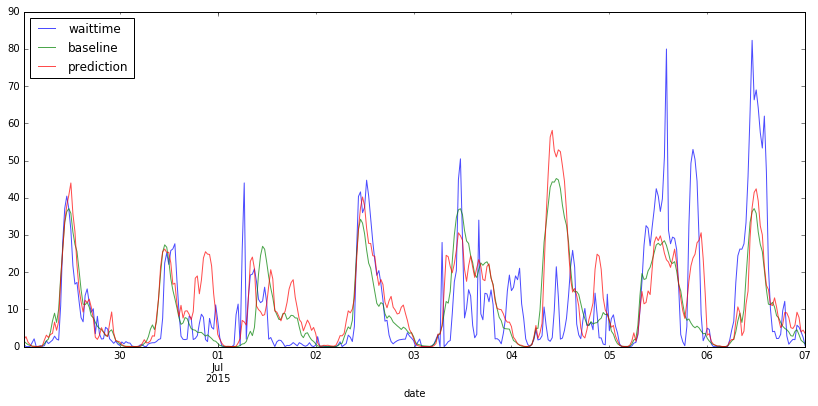

In [29]:
data = BorderData(df)

model = ExtraTreesRegressor(n_jobs=-1, n_estimators=100, bootstrap=True, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)
data.predict(grid)
data.print_metrics(grid)
data.plot('6/29/15', '7/7/15');

In [30]:
print data.X.columns.values[np.argsort(grid.best_estimator_.feature_importances_)[::-1]]
print sorted(grid.best_estimator_.feature_importances_)[::-1]

['minofday' 'month' 'dayofweek' 'year' 'ca_goodfriday' 'us_veterans'
 'us_memorial' 'us_washington' 'us_thanksgiving' 'newyears'
 'us_independence' 'us_mlk' 'ca_canada' 'ca_civic' 'us_thanksgiving_m1'
 'newyears_m1' 'us_thanksgiving_m3' 'us_thanksgiving_m2' 'xmas'
 'newyears_m2' 'newyears_m3' 'ca_victoria' 'ca_victoria_p1'
 'ca_goodfriday_p3' 'ca_victoria_p3' 'us_washington_p1' 'ca_goodfriday_p2'
 'ca_victoria_p2' 'ca_goodfriday_m2' 'mothers' 'us_washington_p3'
 'ca_civic_p3' 'ca_goodfriday_p1' 'ca_goodfriday_m3' 'ca_civic_p1'
 'ca_civic_p2' 'us_washington_p2' 'ca_goodfriday_m1' 'us_columbus_p1'
 'us_columbus_p3' 'us_columbus_p2' 'labor' 'mothers_p3' 'us_veterans_m1'
 'labor_p3' 'labor_p1' 'mothers_p1' 'labor_p2' 'mothers_p2' 'ca_canada_p3'
 'us_columbus' 'ca_canada_p2' 'us_veterans_m2' 'ca_canada_p1'
 'us_veterans_m3' 'newyears_p3' 'us_veterans_p3' 'newyears_p1'
 'us_veterans_p2' 'us_veterans_p1' 'newyears_p2' 'us_memorial_p2'
 'us_memorial_p1' 'xmas_m2' 'xmas_m1' 'xmas_m3' 'us_memori

## +1,2,3,4 -1,2,3,4 - Removed ca_family

In [31]:
query = '''
        select 
            c.date,
            waittime,
            year,
            month,
            dayofweek,
            minofday,
            h.labor,
            h.newyears,
            h.us_mlk,
            h.us_washington,
            h.us_memorial,
            h.us_independence,
            h.us_columbus,
            h.us_veterans,
            h.us_thanksgiving,
            h.xmas,
            h.ca_goodfriday,
            h.ca_victoria,
            h.ca_canada,
            h.ca_civic,
            h.ca_thanksgiving,
            h.mothers,
            hp1.labor as labor_p1,
            hp1.newyears as newyears_p1,
            hp1.us_mlk as us_mlk_p1,
            hp1.us_washington as us_washington_p1,
            hp1.us_memorial as us_memorial_p1,
            hp1.us_independence as us_independence_p1,
            hp1.us_columbus as us_columbus_p1,
            hp1.us_veterans as us_veterans_p1,
            hp1.us_thanksgiving as us_thanksgiving_p1,
            hp1.xmas as xmas_p1,
            hp1.ca_goodfriday as ca_goodfriday_p1,
            hp1.ca_victoria as ca_victoria_p1,
            hp1.ca_canada as ca_canada_p1,
            hp1.ca_civic as ca_civic_p1,
            hp1.ca_thanksgiving as ca_thanksgiving_p1,
            hp1.mothers as mothers_p1,
            hm1.labor as labor_m1,
            hm1.newyears as newyears_m1,
            hm1.us_mlk as us_mlk_m1,
            hm1.us_washington as us_washington_m1,
            hm1.us_memorial as us_memorial_m1,
            hm1.us_independence as us_independence_m1,
            hm1.us_columbus as us_columbus_m1,
            hm1.us_veterans as us_veterans_m1,
            hm1.us_thanksgiving as us_thanksgiving_m1,
            hm1.xmas as xmas_m1,
            hm1.ca_goodfriday as ca_goodfriday_m1,
            hm1.ca_victoria as ca_victoria_m1,
            hm1.ca_canada as ca_canada_m1,
            hm1.ca_civic as ca_civic_m1,
            hm1.ca_thanksgiving as ca_thanksgiving_m1,
            hm1.mothers as mothers_m1,
            hp2.labor as labor_p2,
            hp2.newyears as newyears_p2,
            hp2.us_mlk as us_mlk_p2,
            hp2.us_washington as us_washington_p2,
            hp2.us_memorial as us_memorial_p2,
            hp2.us_independence as us_independence_p2,
            hp2.us_columbus as us_columbus_p2,
            hp2.us_veterans as us_veterans_p2,
            hp2.us_thanksgiving as us_thanksgiving_p2,
            hp2.xmas as xmas_p2,
            hp2.ca_goodfriday as ca_goodfriday_p2,
            hp2.ca_victoria as ca_victoria_p2,
            hp2.ca_canada as ca_canada_p2,
            hp2.ca_civic as ca_civic_p2,
            hp2.ca_thanksgiving as ca_thanksgiving_p2,
            hp2.mothers as mothers_p2,
            hm2.labor as labor_m2,
            hm2.newyears as newyears_m2,
            hm2.us_mlk as us_mlk_m2,
            hm2.us_washington as us_washington_m2,
            hm2.us_memorial as us_memorial_m2,
            hm2.us_independence as us_independence_m2,
            hm2.us_columbus as us_columbus_m2,
            hm2.us_veterans as us_veterans_m2,
            hm2.us_thanksgiving as us_thanksgiving_m2,
            hm2.xmas as xmas_m2,
            hm2.ca_goodfriday as ca_goodfriday_m2,
            hm2.ca_victoria as ca_victoria_m2,
            hm2.ca_canada as ca_canada_m2,
            hm2.ca_civic as ca_civic_m2,
            hm2.ca_thanksgiving as ca_thanksgiving_m2,
            hm2.mothers as mothers_m2,
            hp3.labor as labor_p3,
            hp3.newyears as newyears_p3,
            hp3.us_mlk as us_mlk_p3,
            hp3.us_washington as us_washington_p3,
            hp3.us_memorial as us_memorial_p3,
            hp3.us_independence as us_independence_p3,
            hp3.us_columbus as us_columbus_p3,
            hp3.us_veterans as us_veterans_p3,
            hp3.us_thanksgiving as us_thanksgiving_p3,
            hp3.xmas as xmas_p3,
            hp3.ca_goodfriday as ca_goodfriday_p3,
            hp3.ca_victoria as ca_victoria_p3,
            hp3.ca_canada as ca_canada_p3,
            hp3.ca_civic as ca_civic_p3,
            hp3.ca_thanksgiving as ca_thanksgiving_p3,
            hp3.mothers as mothers_p3,
            hm3.labor as labor_m3,
            hm3.newyears as newyears_m3,
            hm3.us_mlk as us_mlk_m3,
            hm3.us_washington as us_washington_m3,
            hm3.us_memorial as us_memorial_m3,
            hm3.us_independence as us_independence_m3,
            hm3.us_columbus as us_columbus_m3,
            hm3.us_veterans as us_veterans_m3,
            hm3.us_thanksgiving as us_thanksgiving_m3,
            hm3.xmas as xmas_m3,
            hm3.ca_goodfriday as ca_goodfriday_m3,
            hm3.ca_victoria as ca_victoria_m3,
            hm3.ca_canada as ca_canada_m3,
            hm3.ca_civic as ca_civic_m3,
            hm3.ca_thanksgiving as ca_thanksgiving_m3,
            hm3.mothers as mothers_m3,
            hp4.labor as labor_p4,
            hp4.newyears as newyears_p4,
            hp4.us_mlk as us_mlk_p4,
            hp4.us_washington as us_washington_p4,
            hp4.us_memorial as us_memorial_p4,
            hp4.us_independence as us_independence_p4,
            hp4.us_columbus as us_columbus_p4,
            hp4.us_veterans as us_veterans_p4,
            hp4.us_thanksgiving as us_thanksgiving_p4,
            hp4.xmas as xmas_p4,
            hp4.ca_goodfriday as ca_goodfriday_p4,
            hp4.ca_victoria as ca_victoria_p4,
            hp4.ca_canada as ca_canada_p4,
            hp4.ca_civic as ca_civic_p4,
            hp4.ca_thanksgiving as ca_thanksgiving_p4,
            hp4.mothers as mothers_p4,
            hm4.labor as labor_m4,
            hm4.newyears as newyears_m4,
            hm4.us_mlk as us_mlk_m4,
            hm4.us_washington as us_washington_m4,
            hm4.us_memorial as us_memorial_m4,
            hm4.us_independence as us_independence_m4,
            hm4.us_columbus as us_columbus_m4,
            hm4.us_veterans as us_veterans_m4,
            hm4.us_thanksgiving as us_thanksgiving_m4,
            hm4.xmas as xmas_m4,
            hm4.ca_goodfriday as ca_goodfriday_m4,
            hm4.ca_victoria as ca_victoria_m4,
            hm4.ca_canada as ca_canada_m4,
            hm4.ca_civic as ca_civic_m4,
            hm4.ca_thanksgiving as ca_thanksgiving_m4,
            hm4.mothers as mothers_m4
        from mungedata c
        join datefeatures d on c.date = d.date
        left join publicholiday h on c.date::timestamp::date = h.date
        left join publicholiday hp1 on c.date::timestamp::date = hp1.date - interval '1 day'
        left join publicholiday hm1 on c.date::timestamp::date = hm1.date + interval '1 day'
        left join publicholiday hp2 on c.date::timestamp::date = hp2.date - interval '1 day'
        left join publicholiday hm2 on c.date::timestamp::date = hm2.date + interval '1 day'
        left join publicholiday hp3 on c.date::timestamp::date = hp3.date - interval '1 day'
        left join publicholiday hm3 on c.date::timestamp::date = hm3.date + interval '1 day'
        left join publicholiday hp4 on c.date::timestamp::date = hp4.date - interval '1 day'
        left join publicholiday hm4 on c.date::timestamp::date = hm4.date + interval '1 day'
        where
            crossing_id = 1
            and c.date >= '2008-1-1'
            and munger_id = 2
            and (minute = 0 or minute = 30)
        order by c.date;
        '''

df = pd_query(query)

In [32]:
data = BorderData(df)

model = ExtraTreesRegressor(n_jobs=-1, n_estimators=100, bootstrap=True, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)
data.predict(grid)
data.print_metrics(grid)

OOB:  0.638713506078
Best score:  0.312848099949
** MSE for last cv fold **
Baseline :  96.7590735774
Model    :  105.598755905
** R^2 for last cv fold **
Baseline :  0.14722281598
Model    :  0.0693150898666
** Explained variance for last cv fold **
Baseline :  0.304333505904
Model    :  0.235602741025


In [33]:
print data.X.columns.values[np.argsort(grid.best_estimator_.feature_importances_)[::-1]]
print sorted(grid.best_estimator_.feature_importances_)[::-1]

['minofday' 'month' 'dayofweek' 'year' 'ca_goodfriday' 'us_veterans'
 'us_memorial' 'us_washington' 'newyears' 'us_independence'
 'us_thanksgiving' 'ca_canada' 'ca_civic' 'us_mlk' 'xmas'
 'us_thanksgiving_m1' 'us_thanksgiving_m3' 'us_thanksgiving_m4'
 'newyears_m4' 'ca_victoria' 'newyears_m3' 'newyears_m2' 'mothers'
 'us_thanksgiving_m2' 'newyears_m1' 'ca_victoria_p4' 'ca_goodfriday_p1'
 'ca_victoria_p3' 'ca_victoria_p1' 'ca_victoria_p2' 'us_washington_p2'
 'ca_goodfriday_p4' 'ca_goodfriday_p2' 'us_washington_p1'
 'ca_goodfriday_m2' 'us_washington_p4' 'ca_goodfriday_p3'
 'us_washington_p3' 'ca_civic_p3' 'ca_civic_p2' 'ca_civic_p4'
 'ca_goodfriday_m4' 'ca_civic_p1' 'ca_goodfriday_m3' 'labor'
 'ca_goodfriday_m1' 'mothers_p1' 'us_columbus_p4' 'us_columbus_p2'
 'us_columbus_p3' 'us_columbus' 'us_columbus_p1' 'ca_canada_p4' 'labor_p3'
 'labor_p2' 'labor_p1' 'mothers_p2' 'labor_p4' 'us_veterans_m4'
 'us_veterans_m2' 'ca_canada_p2' 'mothers_p3' 'mothers_p4' 'us_veterans_m3'
 'ca_canada_p3' 'n

## +1,2,3,4,5 -1,2,3,4,5 - Removed ca_thanksgiving

In [34]:
query = '''
        select 
            c.date,
            waittime,
            year,
            month,
            dayofweek,
            minofday,
            h.labor,
            h.newyears,
            h.us_mlk,
            h.us_washington,
            h.us_memorial,
            h.us_independence,
            h.us_columbus,
            h.us_veterans,
            h.us_thanksgiving,
            h.xmas,
            h.ca_goodfriday,
            h.ca_victoria,
            h.ca_canada,
            h.ca_civic,
            h.mothers,
            hp1.labor as labor_p1,
            hp1.newyears as newyears_p1,
            hp1.us_mlk as us_mlk_p1,
            hp1.us_washington as us_washington_p1,
            hp1.us_memorial as us_memorial_p1,
            hp1.us_independence as us_independence_p1,
            hp1.us_columbus as us_columbus_p1,
            hp1.us_veterans as us_veterans_p1,
            hp1.us_thanksgiving as us_thanksgiving_p1,
            hp1.xmas as xmas_p1,
            hp1.ca_goodfriday as ca_goodfriday_p1,
            hp1.ca_victoria as ca_victoria_p1,
            hp1.ca_canada as ca_canada_p1,
            hp1.ca_civic as ca_civic_p1,
            hp1.mothers as mothers_p1,
            hm1.labor as labor_m1,
            hm1.newyears as newyears_m1,
            hm1.us_mlk as us_mlk_m1,
            hm1.us_washington as us_washington_m1,
            hm1.us_memorial as us_memorial_m1,
            hm1.us_independence as us_independence_m1,
            hm1.us_columbus as us_columbus_m1,
            hm1.us_veterans as us_veterans_m1,
            hm1.us_thanksgiving as us_thanksgiving_m1,
            hm1.xmas as xmas_m1,
            hm1.ca_goodfriday as ca_goodfriday_m1,
            hm1.ca_victoria as ca_victoria_m1,
            hm1.ca_canada as ca_canada_m1,
            hm1.ca_civic as ca_civic_m1,
            hm1.mothers as mothers_m1,
            hp2.labor as labor_p2,
            hp2.newyears as newyears_p2,
            hp2.us_mlk as us_mlk_p2,
            hp2.us_washington as us_washington_p2,
            hp2.us_memorial as us_memorial_p2,
            hp2.us_independence as us_independence_p2,
            hp2.us_columbus as us_columbus_p2,
            hp2.us_veterans as us_veterans_p2,
            hp2.us_thanksgiving as us_thanksgiving_p2,
            hp2.xmas as xmas_p2,
            hp2.ca_goodfriday as ca_goodfriday_p2,
            hp2.ca_victoria as ca_victoria_p2,
            hp2.ca_canada as ca_canada_p2,
            hp2.ca_civic as ca_civic_p2,
            hp2.mothers as mothers_p2,
            hm2.labor as labor_m2,
            hm2.newyears as newyears_m2,
            hm2.us_mlk as us_mlk_m2,
            hm2.us_washington as us_washington_m2,
            hm2.us_memorial as us_memorial_m2,
            hm2.us_independence as us_independence_m2,
            hm2.us_columbus as us_columbus_m2,
            hm2.us_veterans as us_veterans_m2,
            hm2.us_thanksgiving as us_thanksgiving_m2,
            hm2.xmas as xmas_m2,
            hm2.ca_goodfriday as ca_goodfriday_m2,
            hm2.ca_victoria as ca_victoria_m2,
            hm2.ca_canada as ca_canada_m2,
            hm2.ca_civic as ca_civic_m2,
            hm2.mothers as mothers_m2,
            hp3.labor as labor_p3,
            hp3.newyears as newyears_p3,
            hp3.us_mlk as us_mlk_p3,
            hp3.us_washington as us_washington_p3,
            hp3.us_memorial as us_memorial_p3,
            hp3.us_independence as us_independence_p3,
            hp3.us_columbus as us_columbus_p3,
            hp3.us_veterans as us_veterans_p3,
            hp3.us_thanksgiving as us_thanksgiving_p3,
            hp3.xmas as xmas_p3,
            hp3.ca_goodfriday as ca_goodfriday_p3,
            hp3.ca_victoria as ca_victoria_p3,
            hp3.ca_canada as ca_canada_p3,
            hp3.ca_civic as ca_civic_p3,
            hp3.mothers as mothers_p3,
            hm3.labor as labor_m3,
            hm3.newyears as newyears_m3,
            hm3.us_mlk as us_mlk_m3,
            hm3.us_washington as us_washington_m3,
            hm3.us_memorial as us_memorial_m3,
            hm3.us_independence as us_independence_m3,
            hm3.us_columbus as us_columbus_m3,
            hm3.us_veterans as us_veterans_m3,
            hm3.us_thanksgiving as us_thanksgiving_m3,
            hm3.xmas as xmas_m3,
            hm3.ca_goodfriday as ca_goodfriday_m3,
            hm3.ca_victoria as ca_victoria_m3,
            hm3.ca_canada as ca_canada_m3,
            hm3.ca_civic as ca_civic_m3,
            hm3.mothers as mothers_m3,
            hp4.labor as labor_p4,
            hp4.newyears as newyears_p4,
            hp4.us_mlk as us_mlk_p4,
            hp4.us_washington as us_washington_p4,
            hp4.us_memorial as us_memorial_p4,
            hp4.us_independence as us_independence_p4,
            hp4.us_columbus as us_columbus_p4,
            hp4.us_veterans as us_veterans_p4,
            hp4.us_thanksgiving as us_thanksgiving_p4,
            hp4.xmas as xmas_p4,
            hp4.ca_goodfriday as ca_goodfriday_p4,
            hp4.ca_victoria as ca_victoria_p4,
            hp4.ca_canada as ca_canada_p4,
            hp4.ca_civic as ca_civic_p4,
            hp4.mothers as mothers_p4,
            hm4.labor as labor_m4,
            hm4.newyears as newyears_m4,
            hm4.us_mlk as us_mlk_m4,
            hm4.us_washington as us_washington_m4,
            hm4.us_memorial as us_memorial_m4,
            hm4.us_independence as us_independence_m4,
            hm4.us_columbus as us_columbus_m4,
            hm4.us_veterans as us_veterans_m4,
            hm4.us_thanksgiving as us_thanksgiving_m4,
            hm4.xmas as xmas_m4,
            hm4.ca_goodfriday as ca_goodfriday_m4,
            hm4.ca_victoria as ca_victoria_m4,
            hm4.ca_canada as ca_canada_m4,
            hm4.ca_civic as ca_civic_m4,
            hm4.mothers as mothers_m4,
            hp5.labor as labor_p5,
            hp5.newyears as newyears_p5,
            hp5.us_mlk as us_mlk_p5,
            hp5.us_washington as us_washington_p5,
            hp5.us_memorial as us_memorial_p5,
            hp5.us_independence as us_independence_p5,
            hp5.us_columbus as us_columbus_p5,
            hp5.us_veterans as us_veterans_p5,
            hp5.us_thanksgiving as us_thanksgiving_p5,
            hp5.xmas as xmas_p5,
            hp5.ca_goodfriday as ca_goodfriday_p5,
            hp5.ca_victoria as ca_victoria_p5,
            hp5.ca_canada as ca_canada_p5,
            hp5.ca_civic as ca_civic_p5,
            hp5.mothers as mothers_p5,
            hm5.labor as labor_m5,
            hm5.newyears as newyears_m5,
            hm5.us_mlk as us_mlk_m5,
            hm5.us_washington as us_washington_m5,
            hm5.us_memorial as us_memorial_m5,
            hm5.us_independence as us_independence_m5,
            hm5.us_columbus as us_columbus_m5,
            hm5.us_veterans as us_veterans_m5,
            hm5.us_thanksgiving as us_thanksgiving_m5,
            hm5.xmas as xmas_m5,
            hm5.ca_goodfriday as ca_goodfriday_m5,
            hm5.ca_victoria as ca_victoria_m5,
            hm5.ca_canada as ca_canada_m5,
            hm5.ca_civic as ca_civic_m5,
            hm5.mothers as mothers_m5
        from mungedata c
        join datefeatures d on c.date = d.date
        left join publicholiday h on c.date::timestamp::date = h.date
        left join publicholiday hp1 on c.date::timestamp::date = hp1.date - interval '1 day'
        left join publicholiday hm1 on c.date::timestamp::date = hm1.date + interval '1 day'
        left join publicholiday hp2 on c.date::timestamp::date = hp2.date - interval '1 day'
        left join publicholiday hm2 on c.date::timestamp::date = hm2.date + interval '1 day'
        left join publicholiday hp3 on c.date::timestamp::date = hp3.date - interval '1 day'
        left join publicholiday hm3 on c.date::timestamp::date = hm3.date + interval '1 day'
        left join publicholiday hp4 on c.date::timestamp::date = hp4.date - interval '1 day'
        left join publicholiday hm4 on c.date::timestamp::date = hm4.date + interval '1 day'
        left join publicholiday hp5 on c.date::timestamp::date = hp5.date - interval '1 day'
        left join publicholiday hm5 on c.date::timestamp::date = hm5.date + interval '1 day'
        where
            crossing_id = 1
            and c.date >= '2008-1-1'
            and munger_id = 2
            and (minute = 0 or minute = 30)
        order by c.date;
        '''

df = pd_query(query)

In [35]:
data = BorderData(df)

model = ExtraTreesRegressor(n_jobs=-1, n_estimators=100, bootstrap=True, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)
data.predict(grid)
data.print_metrics(grid)

OOB:  0.640154368827
Best score:  0.309596139902
** MSE for last cv fold **
Baseline :  96.7590735774
Model    :  105.087272142
** R^2 for last cv fold **
Baseline :  0.14722281598
Model    :  0.0738230049129
** Explained variance for last cv fold **
Baseline :  0.304333505904
Model    :  0.240195118781


In [36]:
print data.X.columns.values[np.argsort(grid.best_estimator_.feature_importances_)[::-1]]
print sorted(grid.best_estimator_.feature_importances_)[::-1]

['minofday' 'month' 'year' 'dayofweek' 'ca_goodfriday' 'us_veterans'
 'us_memorial' 'us_washington' 'newyears' 'us_thanksgiving'
 'us_independence' 'ca_canada' 'us_mlk' 'ca_civic' 'xmas' 'ca_victoria'
 'mothers' 'us_thanksgiving_m4' 'us_thanksgiving_m5' 'us_thanksgiving_m2'
 'us_thanksgiving_m3' 'us_thanksgiving_m1' 'newyears_m5' 'newyears_m2'
 'newyears_m3' 'newyears_m1' 'ca_goodfriday_p1' 'ca_victoria_p4'
 'newyears_m4' 'ca_victoria_p1' 'us_washington_p4' 'ca_victoria_p5'
 'us_washington_p2' 'labor' 'ca_victoria_p3' 'ca_victoria_p2'
 'ca_goodfriday_p5' 'ca_goodfriday_p3' 'us_washington_p1' 'ca_civic_p2'
 'ca_civic_p3' 'ca_goodfriday_m1' 'ca_civic_p5' 'ca_goodfriday_m4'
 'ca_goodfriday_p4' 'us_washington_p5' 'ca_goodfriday_m2' 'ca_civic_p4'
 'ca_civic_p1' 'ca_goodfriday_m3' 'us_columbus' 'us_washington_p3'
 'ca_goodfriday_p2' 'ca_goodfriday_m5' 'us_columbus_p5' 'us_columbus_p1'
 'us_columbus_p4' 'us_columbus_p2' 'labor_p4' 'ca_canada_p4' 'mothers_p5'
 'mothers_p1' 'labor_p1' 'us_colum

## Rerun with features removed
Remove
* mlk_m+p
* columbus_m
* mothers_m
* victoria_m
* washington_m
* labor_m

In [37]:
query = '''
        select 
            c.date,
            waittime,
            year,
            month,
            dayofweek,
            minofday,
            h.labor,
            h.newyears,
            h.us_mlk,
            h.us_washington,
            h.us_memorial,
            h.us_independence,
            h.us_columbus,
            h.us_veterans,
            h.us_thanksgiving,
            h.xmas,
            h.ca_goodfriday,
            h.ca_victoria,
            h.ca_canada,
            h.ca_civic,
            h.mothers,
            hp1.labor as labor_p1,
            hp1.newyears as newyears_p1,
            hp1.us_washington as us_washington_p1,
            hp1.us_memorial as us_memorial_p1,
            hp1.us_independence as us_independence_p1,
            hp1.us_columbus as us_columbus_p1,
            hp1.us_veterans as us_veterans_p1,
            hp1.us_thanksgiving as us_thanksgiving_p1,
            hp1.xmas as xmas_p1,
            hp1.ca_goodfriday as ca_goodfriday_p1,
            hp1.ca_victoria as ca_victoria_p1,
            hp1.ca_canada as ca_canada_p1,
            hp1.ca_civic as ca_civic_p1,
            hp1.mothers as mothers_p1,
            hm1.newyears as newyears_m1,
            hm1.us_memorial as us_memorial_m1,
            hm1.us_independence as us_independence_m1,
            hm1.us_veterans as us_veterans_m1,
            hm1.us_thanksgiving as us_thanksgiving_m1,
            hm1.xmas as xmas_m1,
            hm1.ca_goodfriday as ca_goodfriday_m1,
            hm1.ca_canada as ca_canada_m1,
            hm1.ca_civic as ca_civic_m1,
            hp2.labor as labor_p2,
            hp2.newyears as newyears_p2,
            hp2.us_washington as us_washington_p2,
            hp2.us_memorial as us_memorial_p2,
            hp2.us_independence as us_independence_p2,
            hp2.us_columbus as us_columbus_p2,
            hp2.us_veterans as us_veterans_p2,
            hp2.us_thanksgiving as us_thanksgiving_p2,
            hp2.xmas as xmas_p2,
            hp2.ca_goodfriday as ca_goodfriday_p2,
            hp2.ca_victoria as ca_victoria_p2,
            hp2.ca_canada as ca_canada_p2,
            hp2.ca_civic as ca_civic_p2,
            hp2.mothers as mothers_p2,
            hm2.newyears as newyears_m2,
            hm2.us_memorial as us_memorial_m2,
            hm2.us_independence as us_independence_m2,
            hm2.us_veterans as us_veterans_m2,
            hm2.us_thanksgiving as us_thanksgiving_m2,
            hm2.xmas as xmas_m2,
            hm2.ca_goodfriday as ca_goodfriday_m2,
            hm2.ca_canada as ca_canada_m2,
            hm2.ca_civic as ca_civic_m2,
            hp3.labor as labor_p3,
            hp3.newyears as newyears_p3,
            hp3.us_washington as us_washington_p3,
            hp3.us_memorial as us_memorial_p3,
            hp3.us_independence as us_independence_p3,
            hp3.us_columbus as us_columbus_p3,
            hp3.us_veterans as us_veterans_p3,
            hp3.us_thanksgiving as us_thanksgiving_p3,
            hp3.xmas as xmas_p3,
            hp3.ca_goodfriday as ca_goodfriday_p3,
            hp3.ca_victoria as ca_victoria_p3,
            hp3.ca_canada as ca_canada_p3,
            hp3.ca_civic as ca_civic_p3,
            hp3.mothers as mothers_p3,
            hm3.newyears as newyears_m3,
            hm3.us_memorial as us_memorial_m3,
            hm3.us_independence as us_independence_m3,
            hm3.us_veterans as us_veterans_m3,
            hm3.us_thanksgiving as us_thanksgiving_m3,
            hm3.xmas as xmas_m3,
            hm3.ca_goodfriday as ca_goodfriday_m3,
            hm3.ca_canada as ca_canada_m3,
            hm3.ca_civic as ca_civic_m3,
            hp4.labor as labor_p4,
            hp4.newyears as newyears_p4,
            hp4.us_washington as us_washington_p4,
            hp4.us_memorial as us_memorial_p4,
            hp4.us_independence as us_independence_p4,
            hp4.us_columbus as us_columbus_p4,
            hp4.us_veterans as us_veterans_p4,
            hp4.us_thanksgiving as us_thanksgiving_p4,
            hp4.xmas as xmas_p4,
            hp4.ca_goodfriday as ca_goodfriday_p4,
            hp4.ca_victoria as ca_victoria_p4,
            hp4.ca_canada as ca_canada_p4,
            hp4.ca_civic as ca_civic_p4,
            hp4.mothers as mothers_p4,
            hm4.newyears as newyears_m4,
            hm4.us_memorial as us_memorial_m4,
            hm4.us_independence as us_independence_m4,
            hm4.us_veterans as us_veterans_m4,
            hm4.us_thanksgiving as us_thanksgiving_m4,
            hm4.xmas as xmas_m4,
            hm4.ca_goodfriday as ca_goodfriday_m4,
            hm4.ca_canada as ca_canada_m4,
            hm4.ca_civic as ca_civic_m4,
            hp5.labor as labor_p5,
            hp5.newyears as newyears_p5,
            hp5.us_washington as us_washington_p5,
            hp5.us_memorial as us_memorial_p5,
            hp5.us_independence as us_independence_p5,
            hp5.us_columbus as us_columbus_p5,
            hp5.us_veterans as us_veterans_p5,
            hp5.us_thanksgiving as us_thanksgiving_p5,
            hp5.xmas as xmas_p5,
            hp5.ca_goodfriday as ca_goodfriday_p5,
            hp5.ca_victoria as ca_victoria_p5,
            hp5.ca_canada as ca_canada_p5,
            hp5.ca_civic as ca_civic_p5,
            hp5.mothers as mothers_p5,
            hm5.newyears as newyears_m5,
            hm5.us_memorial as us_memorial_m5,
            hm5.us_independence as us_independence_m5,
            hm5.us_veterans as us_veterans_m5,
            hm5.us_thanksgiving as us_thanksgiving_m5,
            hm5.xmas as xmas_m5,
            hm5.ca_goodfriday as ca_goodfriday_m5,
            hm5.ca_canada as ca_canada_m5,
            hm5.ca_civic as ca_civic_m5
        from mungedata c
        join datefeatures d on c.date = d.date
        left join publicholiday h on c.date::timestamp::date = h.date
        left join publicholiday hp1 on c.date::timestamp::date = hp1.date - interval '1 day'
        left join publicholiday hm1 on c.date::timestamp::date = hm1.date + interval '1 day'
        left join publicholiday hp2 on c.date::timestamp::date = hp2.date - interval '1 day'
        left join publicholiday hm2 on c.date::timestamp::date = hm2.date + interval '1 day'
        left join publicholiday hp3 on c.date::timestamp::date = hp3.date - interval '1 day'
        left join publicholiday hm3 on c.date::timestamp::date = hm3.date + interval '1 day'
        left join publicholiday hp4 on c.date::timestamp::date = hp4.date - interval '1 day'
        left join publicholiday hm4 on c.date::timestamp::date = hm4.date + interval '1 day'
        left join publicholiday hp5 on c.date::timestamp::date = hp5.date - interval '1 day'
        left join publicholiday hm5 on c.date::timestamp::date = hm5.date + interval '1 day'
        where
            crossing_id = 1
            and c.date >= '2008-1-1'
            and munger_id = 2
            and (minute = 0 or minute = 30)
        order by c.date;
        '''

df = pd_query(query)

In [38]:
data = BorderData(df)

model = ExtraTreesRegressor(n_jobs=-1, n_estimators=100, bootstrap=True, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)
data.predict(grid)
data.print_metrics(grid)

OOB:  0.637161264131
Best score:  0.311199846728
** MSE for last cv fold **
Baseline :  96.7590735774
Model    :  104.738856951
** R^2 for last cv fold **
Baseline :  0.14722281598
Model    :  0.0768937301127
** Explained variance for last cv fold **
Baseline :  0.304333505904
Model    :  0.241645195385


## +6 Mothers & Labor day

In [39]:
query = '''
        select 
            c.date,
            waittime,
            year,
            month,
            dayofweek,
            minofday,
            h.labor,
            h.newyears,
            h.us_mlk,
            h.us_washington,
            h.us_memorial,
            h.us_independence,
            h.us_columbus,
            h.us_veterans,
            h.us_thanksgiving,
            h.xmas,
            h.ca_goodfriday,
            h.ca_victoria,
            h.ca_canada,
            h.ca_civic,
            h.mothers,
            hp1.labor as labor_p1,
            hp1.newyears as newyears_p1,
            hp1.us_washington as us_washington_p1,
            hp1.us_memorial as us_memorial_p1,
            hp1.us_independence as us_independence_p1,
            hp1.us_columbus as us_columbus_p1,
            hp1.us_veterans as us_veterans_p1,
            hp1.us_thanksgiving as us_thanksgiving_p1,
            hp1.xmas as xmas_p1,
            hp1.ca_goodfriday as ca_goodfriday_p1,
            hp1.ca_victoria as ca_victoria_p1,
            hp1.ca_canada as ca_canada_p1,
            hp1.ca_civic as ca_civic_p1,
            hp1.mothers as mothers_p1,
            hm1.newyears as newyears_m1,
            hm1.us_memorial as us_memorial_m1,
            hm1.us_independence as us_independence_m1,
            hm1.us_veterans as us_veterans_m1,
            hm1.us_thanksgiving as us_thanksgiving_m1,
            hm1.xmas as xmas_m1,
            hm1.ca_goodfriday as ca_goodfriday_m1,
            hm1.ca_canada as ca_canada_m1,
            hm1.ca_civic as ca_civic_m1,
            hp2.labor as labor_p2,
            hp2.newyears as newyears_p2,
            hp2.us_washington as us_washington_p2,
            hp2.us_memorial as us_memorial_p2,
            hp2.us_independence as us_independence_p2,
            hp2.us_columbus as us_columbus_p2,
            hp2.us_veterans as us_veterans_p2,
            hp2.us_thanksgiving as us_thanksgiving_p2,
            hp2.xmas as xmas_p2,
            hp2.ca_goodfriday as ca_goodfriday_p2,
            hp2.ca_victoria as ca_victoria_p2,
            hp2.ca_canada as ca_canada_p2,
            hp2.ca_civic as ca_civic_p2,
            hp2.mothers as mothers_p2,
            hm2.newyears as newyears_m2,
            hm2.us_memorial as us_memorial_m2,
            hm2.us_independence as us_independence_m2,
            hm2.us_veterans as us_veterans_m2,
            hm2.us_thanksgiving as us_thanksgiving_m2,
            hm2.xmas as xmas_m2,
            hm2.ca_goodfriday as ca_goodfriday_m2,
            hm2.ca_canada as ca_canada_m2,
            hm2.ca_civic as ca_civic_m2,
            hp3.labor as labor_p3,
            hp3.newyears as newyears_p3,
            hp3.us_washington as us_washington_p3,
            hp3.us_memorial as us_memorial_p3,
            hp3.us_independence as us_independence_p3,
            hp3.us_columbus as us_columbus_p3,
            hp3.us_veterans as us_veterans_p3,
            hp3.us_thanksgiving as us_thanksgiving_p3,
            hp3.xmas as xmas_p3,
            hp3.ca_goodfriday as ca_goodfriday_p3,
            hp3.ca_victoria as ca_victoria_p3,
            hp3.ca_canada as ca_canada_p3,
            hp3.ca_civic as ca_civic_p3,
            hp3.mothers as mothers_p3,
            hm3.newyears as newyears_m3,
            hm3.us_memorial as us_memorial_m3,
            hm3.us_independence as us_independence_m3,
            hm3.us_veterans as us_veterans_m3,
            hm3.us_thanksgiving as us_thanksgiving_m3,
            hm3.xmas as xmas_m3,
            hm3.ca_goodfriday as ca_goodfriday_m3,
            hm3.ca_canada as ca_canada_m3,
            hm3.ca_civic as ca_civic_m3,
            hp4.labor as labor_p4,
            hp4.newyears as newyears_p4,
            hp4.us_washington as us_washington_p4,
            hp4.us_memorial as us_memorial_p4,
            hp4.us_independence as us_independence_p4,
            hp4.us_columbus as us_columbus_p4,
            hp4.us_veterans as us_veterans_p4,
            hp4.us_thanksgiving as us_thanksgiving_p4,
            hp4.xmas as xmas_p4,
            hp4.ca_goodfriday as ca_goodfriday_p4,
            hp4.ca_victoria as ca_victoria_p4,
            hp4.ca_canada as ca_canada_p4,
            hp4.ca_civic as ca_civic_p4,
            hp4.mothers as mothers_p4,
            hm4.newyears as newyears_m4,
            hm4.us_memorial as us_memorial_m4,
            hm4.us_independence as us_independence_m4,
            hm4.us_veterans as us_veterans_m4,
            hm4.us_thanksgiving as us_thanksgiving_m4,
            hm4.xmas as xmas_m4,
            hm4.ca_goodfriday as ca_goodfriday_m4,
            hm4.ca_canada as ca_canada_m4,
            hm4.ca_civic as ca_civic_m4,
            hp5.labor as labor_p5,
            hp5.newyears as newyears_p5,
            hp5.us_washington as us_washington_p5,
            hp5.us_memorial as us_memorial_p5,
            hp5.us_independence as us_independence_p5,
            hp5.us_columbus as us_columbus_p5,
            hp5.us_veterans as us_veterans_p5,
            hp5.us_thanksgiving as us_thanksgiving_p5,
            hp5.xmas as xmas_p5,
            hp5.ca_goodfriday as ca_goodfriday_p5,
            hp5.ca_victoria as ca_victoria_p5,
            hp5.ca_canada as ca_canada_p5,
            hp5.ca_civic as ca_civic_p5,
            hp5.mothers as mothers_p5,
            hm5.newyears as newyears_m5,
            hm5.us_memorial as us_memorial_m5,
            hm5.us_independence as us_independence_m5,
            hm5.us_veterans as us_veterans_m5,
            hm5.us_thanksgiving as us_thanksgiving_m5,
            hm5.xmas as xmas_m5,
            hm5.ca_goodfriday as ca_goodfriday_m5,
            hm5.ca_canada as ca_canada_m5,
            hm5.ca_civic as ca_civic_m5,
            hp6.labor as labor_p6,
            hp6.mothers as mothers_p6
        from mungedata c
        join datefeatures d on c.date = d.date
        left join publicholiday h on c.date::timestamp::date = h.date
        left join publicholiday hp1 on c.date::timestamp::date = hp1.date - interval '1 day'
        left join publicholiday hm1 on c.date::timestamp::date = hm1.date + interval '1 day'
        left join publicholiday hp2 on c.date::timestamp::date = hp2.date - interval '1 day'
        left join publicholiday hm2 on c.date::timestamp::date = hm2.date + interval '1 day'
        left join publicholiday hp3 on c.date::timestamp::date = hp3.date - interval '1 day'
        left join publicholiday hm3 on c.date::timestamp::date = hm3.date + interval '1 day'
        left join publicholiday hp4 on c.date::timestamp::date = hp4.date - interval '1 day'
        left join publicholiday hm4 on c.date::timestamp::date = hm4.date + interval '1 day'
        left join publicholiday hp5 on c.date::timestamp::date = hp5.date - interval '1 day'
        left join publicholiday hm5 on c.date::timestamp::date = hm5.date + interval '1 day'
        left join publicholiday hp6 on c.date::timestamp::date = hp6.date - interval '1 day'
        where
            crossing_id = 1
            and c.date >= '2008-1-1'
            and munger_id = 2
            and (minute = 0 or minute = 30)
        order by c.date;
        '''

df = pd_query(query)

In [40]:
data = BorderData(df)

model = ExtraTreesRegressor(n_jobs=-1, n_estimators=100, bootstrap=True, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)
data.predict(grid)
data.print_metrics(grid)

OOB:  0.637252306426
Best score:  0.30834843413
** MSE for last cv fold **
Baseline :  96.7590735774
Model    :  104.890217268
** R^2 for last cv fold **
Baseline :  0.14722281598
Model    :  0.0755597298979
** Explained variance for last cv fold **
Baseline :  0.304333505904
Model    :  0.241462787276


In [45]:
print data.X.columns.values[np.argsort(grid.best_estimator_.feature_importances_)[::-1]]
print sorted(grid.best_estimator_.feature_importances_)[::-1]

['minofday' 'month' 'dayofweek' 'year' 'ca_goodfriday' 'us_veterans'
 'us_memorial' 'us_washington' 'us_thanksgiving' 'newyears'
 'us_independence' 'ca_canada' 'us_mlk' 'ca_civic' 'xmas' 'ca_victoria'
 'mothers' 'us_thanksgiving_m5' 'us_thanksgiving_m4' 'us_thanksgiving_m1'
 'newyears_m3' 'newyears_m1' 'us_thanksgiving_m3' 'newyears_m5'
 'us_thanksgiving_m2' 'ca_victoria_p1' 'newyears_m4' 'newyears_m2'
 'ca_goodfriday_p3' 'us_washington_p3' 'ca_victoria_p3' 'ca_goodfriday_p2'
 'us_washington_p1' 'ca_goodfriday_p1' 'ca_victoria_p5' 'ca_victoria_p2'
 'labor' 'ca_civic_p2' 'ca_goodfriday_p4' 'ca_goodfriday_m2'
 'ca_goodfriday_m4' 'us_washington_p4' 'us_washington_p2' 'ca_victoria_p4'
 'ca_civic_p3' 'ca_goodfriday_m3' 'ca_civic_p1' 'ca_goodfriday_p5'
 'us_columbus' 'ca_goodfriday_m1' 'ca_civic_p5' 'ca_civic_p4'
 'us_columbus_p3' 'us_columbus_p2' 'us_washington_p5' 'ca_goodfriday_m5'
 'us_columbus_p4' 'us_columbus_p5' 'ca_canada_p2' 'us_columbus_p1'
 'us_veterans_m1' 'us_veterans_m5' 'mothe

## +7 Mothers & Victoria day

In [44]:
query = '''
        select 
            c.date,
            waittime,
            year,
            month,
            dayofweek,
            minofday,
            h.labor,
            h.newyears,
            h.us_mlk,
            h.us_washington,
            h.us_memorial,
            h.us_independence,
            h.us_columbus,
            h.us_veterans,
            h.us_thanksgiving,
            h.xmas,
            h.ca_goodfriday,
            h.ca_victoria,
            h.ca_canada,
            h.ca_civic,
            h.mothers,
            hp1.labor as labor_p1,
            hp1.newyears as newyears_p1,
            hp1.us_washington as us_washington_p1,
            hp1.us_memorial as us_memorial_p1,
            hp1.us_independence as us_independence_p1,
            hp1.us_columbus as us_columbus_p1,
            hp1.us_veterans as us_veterans_p1,
            hp1.us_thanksgiving as us_thanksgiving_p1,
            hp1.xmas as xmas_p1,
            hp1.ca_goodfriday as ca_goodfriday_p1,
            hp1.ca_victoria as ca_victoria_p1,
            hp1.ca_canada as ca_canada_p1,
            hp1.ca_civic as ca_civic_p1,
            hp1.mothers as mothers_p1,
            hm1.newyears as newyears_m1,
            hm1.us_memorial as us_memorial_m1,
            hm1.us_independence as us_independence_m1,
            hm1.us_veterans as us_veterans_m1,
            hm1.us_thanksgiving as us_thanksgiving_m1,
            hm1.xmas as xmas_m1,
            hm1.ca_goodfriday as ca_goodfriday_m1,
            hm1.ca_canada as ca_canada_m1,
            hm1.ca_civic as ca_civic_m1,
            hp2.labor as labor_p2,
            hp2.newyears as newyears_p2,
            hp2.us_washington as us_washington_p2,
            hp2.us_memorial as us_memorial_p2,
            hp2.us_independence as us_independence_p2,
            hp2.us_columbus as us_columbus_p2,
            hp2.us_veterans as us_veterans_p2,
            hp2.us_thanksgiving as us_thanksgiving_p2,
            hp2.xmas as xmas_p2,
            hp2.ca_goodfriday as ca_goodfriday_p2,
            hp2.ca_victoria as ca_victoria_p2,
            hp2.ca_canada as ca_canada_p2,
            hp2.ca_civic as ca_civic_p2,
            hp2.mothers as mothers_p2,
            hm2.newyears as newyears_m2,
            hm2.us_memorial as us_memorial_m2,
            hm2.us_independence as us_independence_m2,
            hm2.us_veterans as us_veterans_m2,
            hm2.us_thanksgiving as us_thanksgiving_m2,
            hm2.xmas as xmas_m2,
            hm2.ca_goodfriday as ca_goodfriday_m2,
            hm2.ca_canada as ca_canada_m2,
            hm2.ca_civic as ca_civic_m2,
            hp3.labor as labor_p3,
            hp3.newyears as newyears_p3,
            hp3.us_washington as us_washington_p3,
            hp3.us_memorial as us_memorial_p3,
            hp3.us_independence as us_independence_p3,
            hp3.us_columbus as us_columbus_p3,
            hp3.us_veterans as us_veterans_p3,
            hp3.us_thanksgiving as us_thanksgiving_p3,
            hp3.xmas as xmas_p3,
            hp3.ca_goodfriday as ca_goodfriday_p3,
            hp3.ca_victoria as ca_victoria_p3,
            hp3.ca_canada as ca_canada_p3,
            hp3.ca_civic as ca_civic_p3,
            hp3.mothers as mothers_p3,
            hm3.newyears as newyears_m3,
            hm3.us_memorial as us_memorial_m3,
            hm3.us_independence as us_independence_m3,
            hm3.us_veterans as us_veterans_m3,
            hm3.us_thanksgiving as us_thanksgiving_m3,
            hm3.xmas as xmas_m3,
            hm3.ca_goodfriday as ca_goodfriday_m3,
            hm3.ca_canada as ca_canada_m3,
            hm3.ca_civic as ca_civic_m3,
            hp4.labor as labor_p4,
            hp4.newyears as newyears_p4,
            hp4.us_washington as us_washington_p4,
            hp4.us_memorial as us_memorial_p4,
            hp4.us_independence as us_independence_p4,
            hp4.us_columbus as us_columbus_p4,
            hp4.us_veterans as us_veterans_p4,
            hp4.us_thanksgiving as us_thanksgiving_p4,
            hp4.xmas as xmas_p4,
            hp4.ca_goodfriday as ca_goodfriday_p4,
            hp4.ca_victoria as ca_victoria_p4,
            hp4.ca_canada as ca_canada_p4,
            hp4.ca_civic as ca_civic_p4,
            hp4.mothers as mothers_p4,
            hm4.newyears as newyears_m4,
            hm4.us_memorial as us_memorial_m4,
            hm4.us_independence as us_independence_m4,
            hm4.us_veterans as us_veterans_m4,
            hm4.us_thanksgiving as us_thanksgiving_m4,
            hm4.xmas as xmas_m4,
            hm4.ca_goodfriday as ca_goodfriday_m4,
            hm4.ca_canada as ca_canada_m4,
            hm4.ca_civic as ca_civic_m4,
            hp5.labor as labor_p5,
            hp5.newyears as newyears_p5,
            hp5.us_washington as us_washington_p5,
            hp5.us_memorial as us_memorial_p5,
            hp5.us_independence as us_independence_p5,
            hp5.us_columbus as us_columbus_p5,
            hp5.us_veterans as us_veterans_p5,
            hp5.us_thanksgiving as us_thanksgiving_p5,
            hp5.xmas as xmas_p5,
            hp5.ca_goodfriday as ca_goodfriday_p5,
            hp5.ca_victoria as ca_victoria_p5,
            hp5.ca_canada as ca_canada_p5,
            hp5.ca_civic as ca_civic_p5,
            hp5.mothers as mothers_p5,
            hm5.newyears as newyears_m5,
            hm5.us_memorial as us_memorial_m5,
            hm5.us_independence as us_independence_m5,
            hm5.us_veterans as us_veterans_m5,
            hm5.us_thanksgiving as us_thanksgiving_m5,
            hm5.xmas as xmas_m5,
            hm5.ca_goodfriday as ca_goodfriday_m5,
            hm5.ca_canada as ca_canada_m5,
            hm5.ca_civic as ca_civic_m5,
            hp6.labor as labor_p6,
            hp6.mothers as mothers_p6,
            hp7.mothers as mothers_p7,
            hp7.ca_victoria as ca_victoria_p7
        from mungedata c
        join datefeatures d on c.date = d.date
        left join publicholiday h on c.date::timestamp::date = h.date
        left join publicholiday hp1 on c.date::timestamp::date = hp1.date - interval '1 day'
        left join publicholiday hm1 on c.date::timestamp::date = hm1.date + interval '1 day'
        left join publicholiday hp2 on c.date::timestamp::date = hp2.date - interval '1 day'
        left join publicholiday hm2 on c.date::timestamp::date = hm2.date + interval '1 day'
        left join publicholiday hp3 on c.date::timestamp::date = hp3.date - interval '1 day'
        left join publicholiday hm3 on c.date::timestamp::date = hm3.date + interval '1 day'
        left join publicholiday hp4 on c.date::timestamp::date = hp4.date - interval '1 day'
        left join publicholiday hm4 on c.date::timestamp::date = hm4.date + interval '1 day'
        left join publicholiday hp5 on c.date::timestamp::date = hp5.date - interval '1 day'
        left join publicholiday hm5 on c.date::timestamp::date = hm5.date + interval '1 day'
        left join publicholiday hp6 on c.date::timestamp::date = hp6.date - interval '1 day'
        left join publicholiday hp7 on c.date::timestamp::date = hp7.date - interval '1 day'
        where
            crossing_id = 1
            and c.date >= '2008-1-1'
            and munger_id = 2
            and (minute = 0 or minute = 30)
        order by c.date;
        '''

df = pd_query(query)

In [46]:
data = BorderData(df)

model = ExtraTreesRegressor(n_jobs=-1, n_estimators=100, bootstrap=True, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)
data.predict(grid)
data.print_metrics(grid)

OOB:  0.637356139178
Best score:  0.301037059221
** MSE for last cv fold **
Baseline :  96.7590735774
Model    :  105.162029646
** R^2 for last cv fold **
Baseline :  0.14722281598
Model    :  0.0731641365337
** Explained variance for last cv fold **
Baseline :  0.304333505904
Model    :  0.239503597968


## Add weather features with lead effect

In [47]:
query = '''
        select 
            c.date,
            waittime,
            year,
            month,
            dayofweek,
            minofday,
            w.temp_max,
            w.temp_mean,
            w.temp_min,
            w.viz_max,
            w.wind_max,
            w.precip,
            w.rain,
            w.snow,
            w.fog,
            w.thunderstorm,
            wp1.temp_max as temp_max_p1,
            wp1.temp_mean as temp_mean_p1,
            wp1.temp_min as temp_min_p1,
            wp1.precip as precip_p1,
            wp1.rain as rain_p1,
            wp1.snow as snow_p1,
            wp1.thunderstorm as thunderstorm_p1,
            wp2.temp_max as temp_max_p2,
            wp2.temp_mean as temp_mean_p2,
            wp2.temp_min as temp_min_p2,
            wp2.precip as precip_p2,
            wp2.rain as rain_p2,
            wp2.snow as snow_p2,
            wp2.thunderstorm as thunderstorm_p2,
            wp3.temp_max as temp_max_p3,
            wp3.temp_mean as temp_mean_p3,
            wp3.temp_min as temp_min_p3,
            wp3.precip as precip_p3,
            wp3.rain as rain_p3,
            wp3.snow as snow_p3,
            wp3.thunderstorm as thunderstorm_p3,
            h.labor,
            h.newyears,
            h.us_mlk,
            h.us_washington,
            h.us_memorial,
            h.us_independence,
            h.us_columbus,
            h.us_veterans,
            h.us_thanksgiving,
            h.xmas,
            h.ca_goodfriday,
            h.ca_victoria,
            h.ca_canada,
            h.ca_civic,
            h.mothers,
            hp1.labor as labor_p1,
            hp1.newyears as newyears_p1,
            hp1.us_washington as us_washington_p1,
            hp1.us_memorial as us_memorial_p1,
            hp1.us_independence as us_independence_p1,
            hp1.us_columbus as us_columbus_p1,
            hp1.us_veterans as us_veterans_p1,
            hp1.us_thanksgiving as us_thanksgiving_p1,
            hp1.xmas as xmas_p1,
            hp1.ca_goodfriday as ca_goodfriday_p1,
            hp1.ca_victoria as ca_victoria_p1,
            hp1.ca_canada as ca_canada_p1,
            hp1.ca_civic as ca_civic_p1,
            hp1.mothers as mothers_p1,
            hm1.newyears as newyears_m1,
            hm1.us_memorial as us_memorial_m1,
            hm1.us_independence as us_independence_m1,
            hm1.us_veterans as us_veterans_m1,
            hm1.us_thanksgiving as us_thanksgiving_m1,
            hm1.xmas as xmas_m1,
            hm1.ca_goodfriday as ca_goodfriday_m1,
            hm1.ca_canada as ca_canada_m1,
            hm1.ca_civic as ca_civic_m1,
            hp2.labor as labor_p2,
            hp2.newyears as newyears_p2,
            hp2.us_washington as us_washington_p2,
            hp2.us_memorial as us_memorial_p2,
            hp2.us_independence as us_independence_p2,
            hp2.us_columbus as us_columbus_p2,
            hp2.us_veterans as us_veterans_p2,
            hp2.us_thanksgiving as us_thanksgiving_p2,
            hp2.xmas as xmas_p2,
            hp2.ca_goodfriday as ca_goodfriday_p2,
            hp2.ca_victoria as ca_victoria_p2,
            hp2.ca_canada as ca_canada_p2,
            hp2.ca_civic as ca_civic_p2,
            hp2.mothers as mothers_p2,
            hm2.newyears as newyears_m2,
            hm2.us_memorial as us_memorial_m2,
            hm2.us_independence as us_independence_m2,
            hm2.us_veterans as us_veterans_m2,
            hm2.us_thanksgiving as us_thanksgiving_m2,
            hm2.xmas as xmas_m2,
            hm2.ca_goodfriday as ca_goodfriday_m2,
            hm2.ca_canada as ca_canada_m2,
            hm2.ca_civic as ca_civic_m2,
            hp3.labor as labor_p3,
            hp3.newyears as newyears_p3,
            hp3.us_washington as us_washington_p3,
            hp3.us_memorial as us_memorial_p3,
            hp3.us_independence as us_independence_p3,
            hp3.us_columbus as us_columbus_p3,
            hp3.us_veterans as us_veterans_p3,
            hp3.us_thanksgiving as us_thanksgiving_p3,
            hp3.xmas as xmas_p3,
            hp3.ca_goodfriday as ca_goodfriday_p3,
            hp3.ca_victoria as ca_victoria_p3,
            hp3.ca_canada as ca_canada_p3,
            hp3.ca_civic as ca_civic_p3,
            hp3.mothers as mothers_p3,
            hm3.newyears as newyears_m3,
            hm3.us_memorial as us_memorial_m3,
            hm3.us_independence as us_independence_m3,
            hm3.us_veterans as us_veterans_m3,
            hm3.us_thanksgiving as us_thanksgiving_m3,
            hm3.xmas as xmas_m3,
            hm3.ca_goodfriday as ca_goodfriday_m3,
            hm3.ca_canada as ca_canada_m3,
            hm3.ca_civic as ca_civic_m3,
            hp4.labor as labor_p4,
            hp4.newyears as newyears_p4,
            hp4.us_washington as us_washington_p4,
            hp4.us_memorial as us_memorial_p4,
            hp4.us_independence as us_independence_p4,
            hp4.us_columbus as us_columbus_p4,
            hp4.us_veterans as us_veterans_p4,
            hp4.us_thanksgiving as us_thanksgiving_p4,
            hp4.xmas as xmas_p4,
            hp4.ca_goodfriday as ca_goodfriday_p4,
            hp4.ca_victoria as ca_victoria_p4,
            hp4.ca_canada as ca_canada_p4,
            hp4.ca_civic as ca_civic_p4,
            hp4.mothers as mothers_p4,
            hm4.newyears as newyears_m4,
            hm4.us_memorial as us_memorial_m4,
            hm4.us_independence as us_independence_m4,
            hm4.us_veterans as us_veterans_m4,
            hm4.us_thanksgiving as us_thanksgiving_m4,
            hm4.xmas as xmas_m4,
            hm4.ca_goodfriday as ca_goodfriday_m4,
            hm4.ca_canada as ca_canada_m4,
            hm4.ca_civic as ca_civic_m4,
            hp5.labor as labor_p5,
            hp5.newyears as newyears_p5,
            hp5.us_washington as us_washington_p5,
            hp5.us_memorial as us_memorial_p5,
            hp5.us_independence as us_independence_p5,
            hp5.us_columbus as us_columbus_p5,
            hp5.us_veterans as us_veterans_p5,
            hp5.us_thanksgiving as us_thanksgiving_p5,
            hp5.xmas as xmas_p5,
            hp5.ca_goodfriday as ca_goodfriday_p5,
            hp5.ca_victoria as ca_victoria_p5,
            hp5.ca_canada as ca_canada_p5,
            hp5.ca_civic as ca_civic_p5,
            hp5.mothers as mothers_p5,
            hm5.newyears as newyears_m5,
            hm5.us_memorial as us_memorial_m5,
            hm5.us_independence as us_independence_m5,
            hm5.us_veterans as us_veterans_m5,
            hm5.us_thanksgiving as us_thanksgiving_m5,
            hm5.xmas as xmas_m5,
            hm5.ca_goodfriday as ca_goodfriday_m5,
            hm5.ca_canada as ca_canada_m5,
            hm5.ca_civic as ca_civic_m5,
            hp6.labor as labor_p6,
            hp6.mothers as mothers_p6,
            hp7.mothers as mothers_p7,
            hp7.ca_victoria as ca_victoria_p7
        from mungedata c
        join datefeatures d on c.date = d.date
        left join publicholiday h on c.date::timestamp::date = h.date
        left join publicholiday hp1 on c.date::timestamp::date = hp1.date - interval '1 day'
        left join publicholiday hm1 on c.date::timestamp::date = hm1.date + interval '1 day'
        left join publicholiday hp2 on c.date::timestamp::date = hp2.date - interval '1 day'
        left join publicholiday hm2 on c.date::timestamp::date = hm2.date + interval '1 day'
        left join publicholiday hp3 on c.date::timestamp::date = hp3.date - interval '1 day'
        left join publicholiday hm3 on c.date::timestamp::date = hm3.date + interval '1 day'
        left join publicholiday hp4 on c.date::timestamp::date = hp4.date - interval '1 day'
        left join publicholiday hm4 on c.date::timestamp::date = hm4.date + interval '1 day'
        left join publicholiday hp5 on c.date::timestamp::date = hp5.date - interval '1 day'
        left join publicholiday hm5 on c.date::timestamp::date = hm5.date + interval '1 day'
        left join publicholiday hp6 on c.date::timestamp::date = hp6.date - interval '1 day'
        left join publicholiday hp7 on c.date::timestamp::date = hp7.date - interval '1 day'
        left join weather w on c.date::timestamp::date = w.date
        left join weather wp1 on c.date::timestamp::date = wp1.date - interval '1 day'
        left join weather wp2 on c.date::timestamp::date = wp2.date - interval '2 day'
        left join weather wp3 on c.date::timestamp::date = wp3.date - interval '3 day'
        where
            crossing_id = 1
            and c.date >= '2008-1-1'
            and munger_id = 2
            and (minute = 0 or minute = 30)
        order by c.date;
        '''

df = pd_query(query)

In [48]:
data = BorderData(df)

model = ExtraTreesRegressor(n_jobs=-1, n_estimators=100, bootstrap=True, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)
data.predict(grid)
data.print_metrics(grid)

OOB:  0.898226867091
Best score:  0.356792061525
** MSE for last cv fold **
Baseline :  96.7590735774
Model    :  107.890701437
** R^2 for last cv fold **
Baseline :  0.14722281598
Model    :  0.0491152389951
** Explained variance for last cv fold **
Baseline :  0.304333505904
Model    :  0.279144392112


In [49]:
print data.X.columns.values[np.argsort(grid.best_estimator_.feature_importances_)[::-1]]
print sorted(grid.best_estimator_.feature_importances_)[::-1]

['minofday' 'dayofweek' 'year' 'month' 'temp_mean' 'temp_min' 'temp_min_p1'
 'wind_max' 'temp_min_p2' 'temp_mean_p1' 'temp_min_p3' 'temp_max'
 'temp_mean_p2' 'temp_max_p2' 'temp_max_p3' 'temp_max_p1' 'temp_mean_p3'
 'precip_p3' 'precip_p1' 'precip_p2' 'precip' 'ca_goodfriday' 'rain_p1'
 'rain_p3' 'rain' 'rain_p2' 'fog' 'us_veterans' 'snow_p3' 'us_memorial'
 'us_washington' 'snow_p2' 'snow' 'us_thanksgiving' 'snow_p1' 'viz_max'
 'newyears' 'us_mlk' 'us_independence' 'ca_canada' 'thunderstorm_p2'
 'ca_victoria' 'ca_civic' 'newyears_m1' 'newyears_m3' 'xmas' 'newyears_m2'
 'newyears_m5' 'newyears_m4' 'ca_goodfriday_p1' 'ca_goodfriday_p5'
 'ca_goodfriday_p4' 'us_washington_p3' 'ca_goodfriday_p2'
 'us_thanksgiving_m2' 'thunderstorm_p3' 'us_thanksgiving_m3'
 'us_washington_p4' 'ca_goodfriday_m1' 'us_washington_p2'
 'us_washington_p1' 'us_washington_p5' 'ca_victoria_p5' 'thunderstorm_p1'
 'ca_victoria_p2' 'us_thanksgiving_m5' 'ca_goodfriday_m3'
 'us_thanksgiving_m1' 'ca_goodfriday_p3' 'ca_vict

## Weather with -1 lag effect

In [50]:
query = '''
        select 
            c.date,
            waittime,
            year,
            month,
            dayofweek,
            minofday,
            w.temp_max,
            w.temp_mean,
            w.temp_min,
            w.viz_max,
            w.wind_max,
            w.precip,
            w.rain,
            w.snow,
            w.fog,
            w.thunderstorm,
            wp1.temp_max as temp_max_p1,
            wp1.temp_mean as temp_mean_p1,
            wp1.temp_min as temp_min_p1,
            wp1.precip as precip_p1,
            wp1.rain as rain_p1,
            wp1.snow as snow_p1,
            wp1.thunderstorm as thunderstorm_p1,
            wp2.temp_max as temp_max_p2,
            wp2.temp_mean as temp_mean_p2,
            wp2.temp_min as temp_min_p2,
            wp2.precip as precip_p2,
            wp2.rain as rain_p2,
            wp2.snow as snow_p2,
            wp2.thunderstorm as thunderstorm_p2,
            wp3.temp_max as temp_max_p3,
            wp3.temp_mean as temp_mean_p3,
            wp3.temp_min as temp_min_p3,
            wp3.precip as precip_p3,
            wp3.rain as rain_p3,
            wp3.snow as snow_p3,
            wp3.thunderstorm as thunderstorm_p3,
            wm1.temp_max as temp_max_m1,
            wm1.temp_mean as temp_mean_m1,
            wm1.temp_min as temp_min_m1,
            wm1.precip as precip_m1,
            wm1.rain as rain_m1,
            wm1.snow as snow_m1,
            wm1.thunderstorm as thunderstorm_m1,
            h.labor,
            h.newyears,
            h.us_mlk,
            h.us_washington,
            h.us_memorial,
            h.us_independence,
            h.us_columbus,
            h.us_veterans,
            h.us_thanksgiving,
            h.xmas,
            h.ca_goodfriday,
            h.ca_victoria,
            h.ca_canada,
            h.ca_civic,
            h.mothers,
            hp1.labor as labor_p1,
            hp1.newyears as newyears_p1,
            hp1.us_washington as us_washington_p1,
            hp1.us_memorial as us_memorial_p1,
            hp1.us_independence as us_independence_p1,
            hp1.us_columbus as us_columbus_p1,
            hp1.us_veterans as us_veterans_p1,
            hp1.us_thanksgiving as us_thanksgiving_p1,
            hp1.xmas as xmas_p1,
            hp1.ca_goodfriday as ca_goodfriday_p1,
            hp1.ca_victoria as ca_victoria_p1,
            hp1.ca_canada as ca_canada_p1,
            hp1.ca_civic as ca_civic_p1,
            hp1.mothers as mothers_p1,
            hm1.newyears as newyears_m1,
            hm1.us_memorial as us_memorial_m1,
            hm1.us_independence as us_independence_m1,
            hm1.us_veterans as us_veterans_m1,
            hm1.us_thanksgiving as us_thanksgiving_m1,
            hm1.xmas as xmas_m1,
            hm1.ca_goodfriday as ca_goodfriday_m1,
            hm1.ca_canada as ca_canada_m1,
            hm1.ca_civic as ca_civic_m1,
            hp2.labor as labor_p2,
            hp2.newyears as newyears_p2,
            hp2.us_washington as us_washington_p2,
            hp2.us_memorial as us_memorial_p2,
            hp2.us_independence as us_independence_p2,
            hp2.us_columbus as us_columbus_p2,
            hp2.us_veterans as us_veterans_p2,
            hp2.us_thanksgiving as us_thanksgiving_p2,
            hp2.xmas as xmas_p2,
            hp2.ca_goodfriday as ca_goodfriday_p2,
            hp2.ca_victoria as ca_victoria_p2,
            hp2.ca_canada as ca_canada_p2,
            hp2.ca_civic as ca_civic_p2,
            hp2.mothers as mothers_p2,
            hm2.newyears as newyears_m2,
            hm2.us_memorial as us_memorial_m2,
            hm2.us_independence as us_independence_m2,
            hm2.us_veterans as us_veterans_m2,
            hm2.us_thanksgiving as us_thanksgiving_m2,
            hm2.xmas as xmas_m2,
            hm2.ca_goodfriday as ca_goodfriday_m2,
            hm2.ca_canada as ca_canada_m2,
            hm2.ca_civic as ca_civic_m2,
            hp3.labor as labor_p3,
            hp3.newyears as newyears_p3,
            hp3.us_washington as us_washington_p3,
            hp3.us_memorial as us_memorial_p3,
            hp3.us_independence as us_independence_p3,
            hp3.us_columbus as us_columbus_p3,
            hp3.us_veterans as us_veterans_p3,
            hp3.us_thanksgiving as us_thanksgiving_p3,
            hp3.xmas as xmas_p3,
            hp3.ca_goodfriday as ca_goodfriday_p3,
            hp3.ca_victoria as ca_victoria_p3,
            hp3.ca_canada as ca_canada_p3,
            hp3.ca_civic as ca_civic_p3,
            hp3.mothers as mothers_p3,
            hm3.newyears as newyears_m3,
            hm3.us_memorial as us_memorial_m3,
            hm3.us_independence as us_independence_m3,
            hm3.us_veterans as us_veterans_m3,
            hm3.us_thanksgiving as us_thanksgiving_m3,
            hm3.xmas as xmas_m3,
            hm3.ca_goodfriday as ca_goodfriday_m3,
            hm3.ca_canada as ca_canada_m3,
            hm3.ca_civic as ca_civic_m3,
            hp4.labor as labor_p4,
            hp4.newyears as newyears_p4,
            hp4.us_washington as us_washington_p4,
            hp4.us_memorial as us_memorial_p4,
            hp4.us_independence as us_independence_p4,
            hp4.us_columbus as us_columbus_p4,
            hp4.us_veterans as us_veterans_p4,
            hp4.us_thanksgiving as us_thanksgiving_p4,
            hp4.xmas as xmas_p4,
            hp4.ca_goodfriday as ca_goodfriday_p4,
            hp4.ca_victoria as ca_victoria_p4,
            hp4.ca_canada as ca_canada_p4,
            hp4.ca_civic as ca_civic_p4,
            hp4.mothers as mothers_p4,
            hm4.newyears as newyears_m4,
            hm4.us_memorial as us_memorial_m4,
            hm4.us_independence as us_independence_m4,
            hm4.us_veterans as us_veterans_m4,
            hm4.us_thanksgiving as us_thanksgiving_m4,
            hm4.xmas as xmas_m4,
            hm4.ca_goodfriday as ca_goodfriday_m4,
            hm4.ca_canada as ca_canada_m4,
            hm4.ca_civic as ca_civic_m4,
            hp5.labor as labor_p5,
            hp5.newyears as newyears_p5,
            hp5.us_washington as us_washington_p5,
            hp5.us_memorial as us_memorial_p5,
            hp5.us_independence as us_independence_p5,
            hp5.us_columbus as us_columbus_p5,
            hp5.us_veterans as us_veterans_p5,
            hp5.us_thanksgiving as us_thanksgiving_p5,
            hp5.xmas as xmas_p5,
            hp5.ca_goodfriday as ca_goodfriday_p5,
            hp5.ca_victoria as ca_victoria_p5,
            hp5.ca_canada as ca_canada_p5,
            hp5.ca_civic as ca_civic_p5,
            hp5.mothers as mothers_p5,
            hm5.newyears as newyears_m5,
            hm5.us_memorial as us_memorial_m5,
            hm5.us_independence as us_independence_m5,
            hm5.us_veterans as us_veterans_m5,
            hm5.us_thanksgiving as us_thanksgiving_m5,
            hm5.xmas as xmas_m5,
            hm5.ca_goodfriday as ca_goodfriday_m5,
            hm5.ca_canada as ca_canada_m5,
            hm5.ca_civic as ca_civic_m5,
            hp6.labor as labor_p6,
            hp6.mothers as mothers_p6,
            hp7.mothers as mothers_p7,
            hp7.ca_victoria as ca_victoria_p7
        from mungedata c
        join datefeatures d on c.date = d.date
        left join publicholiday h on c.date::timestamp::date = h.date
        left join publicholiday hp1 on c.date::timestamp::date = hp1.date - interval '1 day'
        left join publicholiday hm1 on c.date::timestamp::date = hm1.date + interval '1 day'
        left join publicholiday hp2 on c.date::timestamp::date = hp2.date - interval '1 day'
        left join publicholiday hm2 on c.date::timestamp::date = hm2.date + interval '1 day'
        left join publicholiday hp3 on c.date::timestamp::date = hp3.date - interval '1 day'
        left join publicholiday hm3 on c.date::timestamp::date = hm3.date + interval '1 day'
        left join publicholiday hp4 on c.date::timestamp::date = hp4.date - interval '1 day'
        left join publicholiday hm4 on c.date::timestamp::date = hm4.date + interval '1 day'
        left join publicholiday hp5 on c.date::timestamp::date = hp5.date - interval '1 day'
        left join publicholiday hm5 on c.date::timestamp::date = hm5.date + interval '1 day'
        left join publicholiday hp6 on c.date::timestamp::date = hp6.date - interval '1 day'
        left join publicholiday hp7 on c.date::timestamp::date = hp7.date - interval '1 day'
        left join weather w on c.date::timestamp::date = w.date
        left join weather wp1 on c.date::timestamp::date = wp1.date - interval '1 day'
        left join weather wp2 on c.date::timestamp::date = wp2.date - interval '2 day'
        left join weather wp3 on c.date::timestamp::date = wp3.date - interval '3 day'
        left join weather wm1 on c.date::timestamp::date = wm1.date + interval '1 day'
        where
            crossing_id = 1
            and c.date >= '2008-1-1'
            and munger_id = 2
            and (minute = 0 or minute = 30)
        order by c.date;
        '''

df = pd_query(query)

In [51]:
data = BorderData(df)

model = ExtraTreesRegressor(n_jobs=-1, n_estimators=100, bootstrap=True, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)
data.predict(grid)
data.print_metrics(grid)

OOB:  0.90129598243
Best score:  0.347599863066
** MSE for last cv fold **
Baseline :  96.7590735774
Model    :  108.87953969
** R^2 for last cv fold **
Baseline :  0.14722281598
Model    :  0.0404002041234
** Explained variance for last cv fold **
Baseline :  0.304333505904
Model    :  0.271618279039


In [52]:
print data.X.columns.values[np.argsort(grid.best_estimator_.feature_importances_)[::-1]]
print sorted(grid.best_estimator_.feature_importances_)[::-1]

['minofday' 'dayofweek' 'year' 'month' 'temp_min_m1' 'wind_max'
 'temp_min_p1' 'temp_min_p2' 'temp_mean' 'temp_mean_p2' 'temp_min'
 'temp_min_p3' 'temp_mean_m1' 'temp_mean_p1' 'temp_max_p1' 'temp_max_m1'
 'temp_max_p3' 'temp_max' 'temp_max_p2' 'temp_mean_p3' 'precip_p3'
 'ca_goodfriday' 'precip_p1' 'precip_m1' 'precip_p2' 'precip' 'rain_p3'
 'rain_m1' 'rain_p1' 'rain_p2' 'rain' 'fog' 'us_veterans' 'snow_p3'
 'us_memorial' 'us_washington' 'snow_p2' 'snow_m1' 'snow' 'us_thanksgiving'
 'viz_max' 'newyears' 'us_mlk' 'snow_p1' 'ca_canada' 'us_independence'
 'thunderstorm_p2' 'newyears_m1' 'ca_victoria' 'ca_civic' 'newyears_m4'
 'thunderstorm_m1' 'newyears_m2' 'xmas' 'newyears_m3' 'newyears_m5'
 'us_washington_p1' 'ca_goodfriday_p4' 'ca_goodfriday_p3'
 'us_washington_p5' 'ca_goodfriday_p5' 'ca_goodfriday_p2'
 'us_thanksgiving_m5' 'thunderstorm_p3' 'ca_goodfriday_p1'
 'us_thanksgiving_m2' 'us_thanksgiving_m3' 'us_washington_p2'
 'ca_victoria_p2' 'ca_goodfriday_m2' 'ca_victoria_p3' 'ca_goodfri

# Query was not correctly accounting for holiday lag/lead effects

In [53]:
query = '''
        select 
            c.date,
            waittime,
            year,
            month,
            dayofweek,
            minofday,
            w.temp_max,
            w.temp_mean,
            w.temp_min,
            w.viz_max,
            w.wind_max,
            w.precip,
            w.rain,
            w.snow,
            w.fog,
            w.thunderstorm,
            wp1.temp_max as temp_max_p1,
            wp1.temp_mean as temp_mean_p1,
            wp1.temp_min as temp_min_p1,
            wp1.precip as precip_p1,
            wp1.rain as rain_p1,
            wp1.snow as snow_p1,
            wp1.thunderstorm as thunderstorm_p1,
            wp2.temp_max as temp_max_p2,
            wp2.temp_mean as temp_mean_p2,
            wp2.temp_min as temp_min_p2,
            wp2.precip as precip_p2,
            wp2.rain as rain_p2,
            wp2.snow as snow_p2,
            wp2.thunderstorm as thunderstorm_p2,
            wp3.temp_max as temp_max_p3,
            wp3.temp_mean as temp_mean_p3,
            wp3.temp_min as temp_min_p3,
            wp3.precip as precip_p3,
            wp3.rain as rain_p3,
            wp3.snow as snow_p3,
            wp3.thunderstorm as thunderstorm_p3,
            wm1.temp_max as temp_max_m1,
            wm1.temp_mean as temp_mean_m1,
            wm1.temp_min as temp_min_m1,
            wm1.precip as precip_m1,
            wm1.rain as rain_m1,
            wm1.snow as snow_m1,
            wm1.thunderstorm as thunderstorm_m1,
            wm2.temp_max as temp_max_m2,
            wm2.temp_mean as temp_mean_m2,
            wm2.temp_min as temp_min_m2,
            wm2.precip as precip_m2,
            wm2.rain as rain_m2,
            wm2.snow as snow_m2,
            wm2.thunderstorm as thunderstorm_m2,
            h.labor,
            h.newyears,
            h.us_mlk,
            h.us_washington,
            h.us_memorial,
            h.us_independence,
            h.us_columbus,
            h.us_veterans,
            h.us_thanksgiving,
            h.xmas,
            h.ca_goodfriday,
            h.ca_victoria,
            h.ca_canada,
            h.ca_civic,
            h.mothers,
            hp1.labor as labor_p1,
            hp1.newyears as newyears_p1,
            hp1.us_washington as us_washington_p1,
            hp1.us_memorial as us_memorial_p1,
            hp1.us_independence as us_independence_p1,
            hp1.us_columbus as us_columbus_p1,
            hp1.us_veterans as us_veterans_p1,
            hp1.us_thanksgiving as us_thanksgiving_p1,
            hp1.xmas as xmas_p1,
            hp1.ca_goodfriday as ca_goodfriday_p1,
            hp1.ca_victoria as ca_victoria_p1,
            hp1.ca_canada as ca_canada_p1,
            hp1.ca_civic as ca_civic_p1,
            hp1.mothers as mothers_p1,
            hm1.newyears as newyears_m1,
            hm1.us_memorial as us_memorial_m1,
            hm1.us_independence as us_independence_m1,
            hm1.us_veterans as us_veterans_m1,
            hm1.us_thanksgiving as us_thanksgiving_m1,
            hm1.xmas as xmas_m1,
            hm1.ca_goodfriday as ca_goodfriday_m1,
            hm1.ca_canada as ca_canada_m1,
            hm1.ca_civic as ca_civic_m1,
            hp2.labor as labor_p2,
            hp2.newyears as newyears_p2,
            hp2.us_washington as us_washington_p2,
            hp2.us_memorial as us_memorial_p2,
            hp2.us_independence as us_independence_p2,
            hp2.us_columbus as us_columbus_p2,
            hp2.us_veterans as us_veterans_p2,
            hp2.us_thanksgiving as us_thanksgiving_p2,
            hp2.xmas as xmas_p2,
            hp2.ca_goodfriday as ca_goodfriday_p2,
            hp2.ca_victoria as ca_victoria_p2,
            hp2.ca_canada as ca_canada_p2,
            hp2.ca_civic as ca_civic_p2,
            hp2.mothers as mothers_p2,
            hm2.newyears as newyears_m2,
            hm2.us_memorial as us_memorial_m2,
            hm2.us_independence as us_independence_m2,
            hm2.us_veterans as us_veterans_m2,
            hm2.us_thanksgiving as us_thanksgiving_m2,
            hm2.xmas as xmas_m2,
            hm2.ca_goodfriday as ca_goodfriday_m2,
            hm2.ca_canada as ca_canada_m2,
            hm2.ca_civic as ca_civic_m2,
            hp3.labor as labor_p3,
            hp3.newyears as newyears_p3,
            hp3.us_washington as us_washington_p3,
            hp3.us_memorial as us_memorial_p3,
            hp3.us_independence as us_independence_p3,
            hp3.us_columbus as us_columbus_p3,
            hp3.us_veterans as us_veterans_p3,
            hp3.us_thanksgiving as us_thanksgiving_p3,
            hp3.xmas as xmas_p3,
            hp3.ca_goodfriday as ca_goodfriday_p3,
            hp3.ca_victoria as ca_victoria_p3,
            hp3.ca_canada as ca_canada_p3,
            hp3.ca_civic as ca_civic_p3,
            hp3.mothers as mothers_p3,
            hm3.newyears as newyears_m3,
            hm3.us_memorial as us_memorial_m3,
            hm3.us_independence as us_independence_m3,
            hm3.us_veterans as us_veterans_m3,
            hm3.us_thanksgiving as us_thanksgiving_m3,
            hm3.xmas as xmas_m3,
            hm3.ca_goodfriday as ca_goodfriday_m3,
            hm3.ca_canada as ca_canada_m3,
            hm3.ca_civic as ca_civic_m3,
            hp4.labor as labor_p4,
            hp4.newyears as newyears_p4,
            hp4.us_washington as us_washington_p4,
            hp4.us_memorial as us_memorial_p4,
            hp4.us_independence as us_independence_p4,
            hp4.us_columbus as us_columbus_p4,
            hp4.us_veterans as us_veterans_p4,
            hp4.us_thanksgiving as us_thanksgiving_p4,
            hp4.xmas as xmas_p4,
            hp4.ca_goodfriday as ca_goodfriday_p4,
            hp4.ca_victoria as ca_victoria_p4,
            hp4.ca_canada as ca_canada_p4,
            hp4.ca_civic as ca_civic_p4,
            hp4.mothers as mothers_p4,
            hm4.newyears as newyears_m4,
            hm4.us_memorial as us_memorial_m4,
            hm4.us_independence as us_independence_m4,
            hm4.us_veterans as us_veterans_m4,
            hm4.us_thanksgiving as us_thanksgiving_m4,
            hm4.xmas as xmas_m4,
            hm4.ca_goodfriday as ca_goodfriday_m4,
            hm4.ca_canada as ca_canada_m4,
            hm4.ca_civic as ca_civic_m4,
            hp5.labor as labor_p5,
            hp5.newyears as newyears_p5,
            hp5.us_washington as us_washington_p5,
            hp5.us_memorial as us_memorial_p5,
            hp5.us_independence as us_independence_p5,
            hp5.us_columbus as us_columbus_p5,
            hp5.us_veterans as us_veterans_p5,
            hp5.us_thanksgiving as us_thanksgiving_p5,
            hp5.xmas as xmas_p5,
            hp5.ca_goodfriday as ca_goodfriday_p5,
            hp5.ca_victoria as ca_victoria_p5,
            hp5.ca_canada as ca_canada_p5,
            hp5.ca_civic as ca_civic_p5,
            hp5.mothers as mothers_p5,
            hm5.newyears as newyears_m5,
            hm5.us_memorial as us_memorial_m5,
            hm5.us_independence as us_independence_m5,
            hm5.us_veterans as us_veterans_m5,
            hm5.us_thanksgiving as us_thanksgiving_m5,
            hm5.xmas as xmas_m5,
            hm5.ca_goodfriday as ca_goodfriday_m5,
            hm5.ca_canada as ca_canada_m5,
            hm5.ca_civic as ca_civic_m5,
            hp6.labor as labor_p6,
            hp6.mothers as mothers_p6,
            hp7.mothers as mothers_p7,
            hp7.ca_victoria as ca_victoria_p7
        from mungedata c
        join datefeatures d on c.date = d.date
        left join publicholiday h on c.date::timestamp::date = h.date
        left join publicholiday hp1 on c.date::timestamp::date = hp1.date - interval '1 day'
        left join publicholiday hm1 on c.date::timestamp::date = hm1.date + interval '1 day'
        left join publicholiday hp2 on c.date::timestamp::date = hp2.date - interval '2 day'
        left join publicholiday hm2 on c.date::timestamp::date = hm2.date + interval '2 day'
        left join publicholiday hp3 on c.date::timestamp::date = hp3.date - interval '3 day'
        left join publicholiday hm3 on c.date::timestamp::date = hm3.date + interval '3 day'
        left join publicholiday hp4 on c.date::timestamp::date = hp4.date - interval '4 day'
        left join publicholiday hm4 on c.date::timestamp::date = hm4.date + interval '4 day'
        left join publicholiday hp5 on c.date::timestamp::date = hp5.date - interval '5 day'
        left join publicholiday hm5 on c.date::timestamp::date = hm5.date + interval '5 day'
        left join publicholiday hp6 on c.date::timestamp::date = hp6.date - interval '6 day'
        left join publicholiday hp7 on c.date::timestamp::date = hp7.date - interval '7 day'
        left join weather w on c.date::timestamp::date = w.date
        left join weather wp1 on c.date::timestamp::date = wp1.date - interval '1 day'
        left join weather wp2 on c.date::timestamp::date = wp2.date - interval '2 day'
        left join weather wp3 on c.date::timestamp::date = wp3.date - interval '3 day'
        left join weather wm1 on c.date::timestamp::date = wm1.date + interval '1 day'
        left join weather wm2 on c.date::timestamp::date = wm2.date + interval '2 day'
        where
            crossing_id = 1
            and c.date >= '2008-1-1'
            and munger_id = 2
            and (minute = 0 or minute = 30)
        order by c.date;
        '''

df = pd_query(query)

In [54]:
data = BorderData(df)

model = ExtraTreesRegressor(n_jobs=-1, n_estimators=100, bootstrap=True, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)
data.predict(grid)
data.print_metrics(grid)

OOB:  0.908887767081
Best score:  0.395517383854
** MSE for last cv fold **
Baseline :  96.7590735774
Model    :  107.672442802
** R^2 for last cv fold **
Baseline :  0.14722281598
Model    :  0.0510388413819
** Explained variance for last cv fold **
Baseline :  0.304333505904
Model    :  0.271977264475


In [55]:
print data.X.columns.values[np.argsort(grid.best_estimator_.feature_importances_)[::-1]]
print sorted(grid.best_estimator_.feature_importances_)[::-1]

['minofday' 'dayofweek' 'year' 'month' 'temp_min_m2' 'ca_goodfriday'
 'temp_mean_m2' 'temp_min_m1' 'wind_max' 'temp_min_p1' 'temp_min_p3'
 'temp_mean_p1' 'temp_max_p2' 'temp_mean' 'temp_min' 'temp_mean_p2'
 'temp_max' 'temp_min_p2' 'temp_mean_m1' 'temp_max_p1' 'temp_max_m2'
 'temp_max_m1' 'temp_max_p3' 'temp_mean_p3' 'precip_p1' 'precip'
 'precip_m2' 'precip_p3' 'precip_m1' 'precip_p2' 'rain_p3' 'rain_m2'
 'rain_p2' 'rain_m1' 'rain_p1' 'rain' 'us_veterans' 'fog' 'newyears_m1'
 'ca_victoria_p2' 'ca_goodfriday_p1' 'us_columbus_p2' 'ca_victoria_p1'
 'us_washington' 'us_memorial' 'us_washington_p1' 'newyears_p3'
 'ca_goodfriday_m1' 'xmas_m2' 'newyears_p5' 'xmas_m5' 'ca_civic_p2'
 'xmas_m4' 'us_thanksgiving' 'us_thanksgiving_m2' 'newyears_p4'
 'newyears_p2' 'xmas_m3' 'newyears' 'us_columbus_p1' 'us_thanksgiving_m1'
 'ca_civic_p1' 'snow_p3' 'ca_civic_p5' 'snow_p2' 'labor_p2' 'snow_m2'
 'us_mlk' 'thunderstorm_m2' 'newyears_m2' 'us_veterans_p4' 'viz_max'
 'labor_p1' 'snow_m1' 'snow_p1' 'us_mem

## Rerun with all holidays to tease out which to drop
Definitely can drop ca_thanksgiving & ca_family

In [56]:
query = '''
        select 
            c.date,
            waittime,
            year,
            month,
            dayofweek,
            minofday,
            w.temp_max,
            w.temp_mean,
            w.temp_min,
            w.viz_max,
            w.wind_max,
            w.precip,
            w.rain,
            w.snow,
            w.fog,
            w.thunderstorm,
            wp1.temp_max as temp_max_p1,
            wp1.temp_mean as temp_mean_p1,
            wp1.temp_min as temp_min_p1,
            wp1.precip as precip_p1,
            wp1.rain as rain_p1,
            wp1.snow as snow_p1,
            wp1.thunderstorm as thunderstorm_p1,
            wp2.temp_max as temp_max_p2,
            wp2.temp_mean as temp_mean_p2,
            wp2.temp_min as temp_min_p2,
            wp2.precip as precip_p2,
            wp2.rain as rain_p2,
            wp2.snow as snow_p2,
            wp2.thunderstorm as thunderstorm_p2,
            wp3.temp_max as temp_max_p3,
            wp3.temp_mean as temp_mean_p3,
            wp3.temp_min as temp_min_p3,
            wp3.precip as precip_p3,
            wp3.rain as rain_p3,
            wp3.snow as snow_p3,
            wp3.thunderstorm as thunderstorm_p3,
            wm1.temp_max as temp_max_m1,
            wm1.temp_mean as temp_mean_m1,
            wm1.temp_min as temp_min_m1,
            wm1.precip as precip_m1,
            wm1.rain as rain_m1,
            wm1.snow as snow_m1,
            wm1.thunderstorm as thunderstorm_m1,
            wm2.temp_max as temp_max_m2,
            wm2.temp_mean as temp_mean_m2,
            wm2.temp_min as temp_min_m2,
            wm2.precip as precip_m2,
            wm2.rain as rain_m2,
            wm2.snow as snow_m2,
            wm2.thunderstorm as thunderstorm_m2,
            h.labor,
            h.newyears,
            h.us_mlk,
            h.us_washington,
            h.us_memorial,
            h.us_independence,
            h.us_columbus,
            h.us_veterans,
            h.us_thanksgiving,
            h.xmas,
            h.ca_goodfriday,
            h.ca_victoria,
            h.ca_canada,
            h.ca_civic,
            h.ca_thanksgiving,
            h.mothers,
            h.ca_family,
            hp1.labor as labor_p1,
            hp1.newyears as newyears_p1,
            hp1.us_mlk as us_mlk_p1,
            hp1.us_washington as us_washington_p1,
            hp1.us_memorial as us_memorial_p1,
            hp1.us_independence as us_independence_p1,
            hp1.us_columbus as us_columbus_p1,
            hp1.us_veterans as us_veterans_p1,
            hp1.us_thanksgiving as us_thanksgiving_p1,
            hp1.xmas as xmas_p1,
            hp1.ca_goodfriday as ca_goodfriday_p1,
            hp1.ca_victoria as ca_victoria_p1,
            hp1.ca_canada as ca_canada_p1,
            hp1.ca_civic as ca_civic_p1,
            hp1.ca_thanksgiving as ca_thanksgiving_p1,
            hp1.mothers as mothers_p1,
            hp1.ca_family as ca_family_p1,
            hm1.labor as labor_m1,
            hm1.newyears as newyears_m1,
            hm1.us_mlk as us_mlk_m1,
            hm1.us_washington as us_washington_m1,
            hm1.us_memorial as us_memorial_m1,
            hm1.us_independence as us_independence_m1,
            hm1.us_columbus as us_columbus_m1,
            hm1.us_veterans as us_veterans_m1,
            hm1.us_thanksgiving as us_thanksgiving_m1,
            hm1.xmas as xmas_m1,
            hm1.ca_goodfriday as ca_goodfriday_m1,
            hm1.ca_victoria as ca_victoria_m1,
            hm1.ca_canada as ca_canada_m1,
            hm1.ca_civic as ca_civic_m1,
            hm1.ca_thanksgiving as ca_thanksgiving_m1,
            hm1.mothers as mothers_m1,
            hm1.ca_family as ca_family_m1,
            hp2.labor as labor_p2,
            hp2.newyears as newyears_p2,
            hp2.us_mlk as us_mlk_p2,
            hp2.us_washington as us_washington_p2,
            hp2.us_memorial as us_memorial_p2,
            hp2.us_independence as us_independence_p2,
            hp2.us_columbus as us_columbus_p2,
            hp2.us_veterans as us_veterans_p2,
            hp2.us_thanksgiving as us_thanksgiving_p2,
            hp2.xmas as xmas_p2,
            hp2.ca_goodfriday as ca_goodfriday_p2,
            hp2.ca_victoria as ca_victoria_p2,
            hp2.ca_canada as ca_canada_p2,
            hp2.ca_civic as ca_civic_p2,
            hp2.ca_thanksgiving as ca_thanksgiving_p2,
            hp2.mothers as mothers_p2,
            hp2.ca_family as ca_family_p2,
            hm2.labor as labor_m2,
            hm2.newyears as newyears_m2,
            hm2.us_mlk as us_mlk_m2,
            hm2.us_washington as us_washington_m2,
            hm2.us_memorial as us_memorial_m2,
            hm2.us_independence as us_independence_m2,
            hm2.us_columbus as us_columbus_m2,
            hm2.us_veterans as us_veterans_m2,
            hm2.us_thanksgiving as us_thanksgiving_m2,
            hm2.xmas as xmas_m2,
            hm2.ca_goodfriday as ca_goodfriday_m2,
            hm2.ca_victoria as ca_victoria_m2,
            hm2.ca_canada as ca_canada_m2,
            hm2.ca_civic as ca_civic_m2,
            hm2.ca_thanksgiving as ca_thanksgiving_m2,
            hm2.mothers as mothers_m2,
            hm2.ca_family as ca_family_m2,
            hp3.labor as labor_p3,
            hp3.newyears as newyears_p3,
            hp3.us_mlk as us_mlk_p3,
            hp3.us_washington as us_washington_p3,
            hp3.us_memorial as us_memorial_p3,
            hp3.us_independence as us_independence_p3,
            hp3.us_columbus as us_columbus_p3,
            hp3.us_veterans as us_veterans_p3,
            hp3.us_thanksgiving as us_thanksgiving_p3,
            hp3.xmas as xmas_p3,
            hp3.ca_goodfriday as ca_goodfriday_p3,
            hp3.ca_victoria as ca_victoria_p3,
            hp3.ca_canada as ca_canada_p3,
            hp3.ca_civic as ca_civic_p3,
            hp3.ca_thanksgiving as ca_thanksgiving_p3,
            hp3.mothers as mothers_p3,
            hp3.ca_family as ca_family_p3,
            hm3.labor as labor_m3,
            hm3.newyears as newyears_m3,
            hm3.us_mlk as us_mlk_m3,
            hm3.us_washington as us_washington_m3,
            hm3.us_memorial as us_memorial_m3,
            hm3.us_independence as us_independence_m3,
            hm3.us_columbus as us_columbus_m3,
            hm3.us_veterans as us_veterans_m3,
            hm3.us_thanksgiving as us_thanksgiving_m3,
            hm3.xmas as xmas_m3,
            hm3.ca_goodfriday as ca_goodfriday_m3,
            hm3.ca_victoria as ca_victoria_m3,
            hm3.ca_canada as ca_canada_m3,
            hm3.ca_civic as ca_civic_m3,
            hm3.ca_thanksgiving as ca_thanksgiving_m3,
            hm3.mothers as mothers_m3,
            hm3.ca_family as ca_family_m3,
            hp4.labor as labor_p4,
            hp4.newyears as newyears_p4,
            hp4.us_mlk as us_mlk_p4,
            hp4.us_washington as us_washington_p4,
            hp4.us_memorial as us_memorial_p4,
            hp4.us_independence as us_independence_p4,
            hp4.us_columbus as us_columbus_p4,
            hp4.us_veterans as us_veterans_p4,
            hp4.us_thanksgiving as us_thanksgiving_p4,
            hp4.xmas as xmas_p4,
            hp4.ca_goodfriday as ca_goodfriday_p4,
            hp4.ca_victoria as ca_victoria_p4,
            hp4.ca_canada as ca_canada_p4,
            hp4.ca_civic as ca_civic_p4,
            hp4.ca_thanksgiving as ca_thanksgiving_p4,
            hp4.mothers as mothers_p4,
            hp4.ca_family as ca_family_p4,
            hm4.labor as labor_m4,
            hm4.newyears as newyears_m4,
            hm4.us_mlk as us_mlk_m4,
            hm4.us_washington as us_washington_m4,
            hm4.us_memorial as us_memorial_m4,
            hm4.us_independence as us_independence_m4,
            hm4.us_columbus as us_columbus_m4,
            hm4.us_veterans as us_veterans_m4,
            hm4.us_thanksgiving as us_thanksgiving_m4,
            hm4.xmas as xmas_m4,
            hm4.ca_goodfriday as ca_goodfriday_m4,
            hm4.ca_victoria as ca_victoria_m4,
            hm4.ca_canada as ca_canada_m4,
            hm4.ca_civic as ca_civic_m4,
            hm4.ca_thanksgiving as ca_thanksgiving_m4,
            hm4.mothers as mothers_m4,
            hm4.ca_family as ca_family_m4,
            hp5.labor as labor_p5,
            hp5.newyears as newyears_p5,
            hp5.us_mlk as us_mlk_p5,
            hp5.us_washington as us_washington_p5,
            hp5.us_memorial as us_memorial_p5,
            hp5.us_independence as us_independence_p5,
            hp5.us_columbus as us_columbus_p5,
            hp5.us_veterans as us_veterans_p5,
            hp5.us_thanksgiving as us_thanksgiving_p5,
            hp5.xmas as xmas_p5,
            hp5.ca_goodfriday as ca_goodfriday_p5,
            hp5.ca_victoria as ca_victoria_p5,
            hp5.ca_canada as ca_canada_p5,
            hp5.ca_civic as ca_civic_p5,
            hp5.ca_thanksgiving as ca_thanksgiving_p5,
            hp5.mothers as mothers_p5,
            hp5.ca_family as ca_family_p5,
            hm5.labor as labor_m5,
            hm5.newyears as newyears_m5,
            hm5.us_mlk as us_mlk_m5,
            hm5.us_washington as us_washington_m5,
            hm5.us_memorial as us_memorial_m5,
            hm5.us_independence as us_independence_m5,
            hm5.us_columbus as us_columbus_m5,
            hm5.us_veterans as us_veterans_m5,
            hm5.us_thanksgiving as us_thanksgiving_m5,
            hm5.xmas as xmas_m5,
            hm5.ca_goodfriday as ca_goodfriday_m5,
            hm5.ca_victoria as ca_victoria_m5,
            hm5.ca_canada as ca_canada_m5,
            hm5.ca_civic as ca_civic_m5,
            hm5.ca_thanksgiving as ca_thanksgiving_m5,
            hm5.mothers as mothers_m5,
            hm5.ca_family as ca_family_m5,
            hp6.labor as labor_p6,
            hp6.newyears as newyears_p6,
            hp6.us_mlk as us_mlk_p6,
            hp6.us_washington as us_washington_p6,
            hp6.us_memorial as us_memorial_p6,
            hp6.us_independence as us_independence_p6,
            hp6.us_columbus as us_columbus_p6,
            hp6.us_veterans as us_veterans_p6,
            hp6.us_thanksgiving as us_thanksgiving_p6,
            hp6.xmas as xmas_p6,
            hp6.ca_goodfriday as ca_goodfriday_p6,
            hp6.ca_victoria as ca_victoria_p6,
            hp6.ca_canada as ca_canada_p6,
            hp6.ca_civic as ca_civic_p6,
            hp6.ca_thanksgiving as ca_thanksgiving_p6,
            hp6.mothers as mothers_p6,
            hp6.ca_family as ca_family_p6,
            hp7.labor as labor_p7,
            hp7.newyears as newyears_p7,
            hp7.us_mlk as us_mlk_p7,
            hp7.us_washington as us_washington_p7,
            hp7.us_memorial as us_memorial_p7,
            hp7.us_independence as us_independence_p7,
            hp7.us_columbus as us_columbus_p7,
            hp7.us_veterans as us_veterans_p7,
            hp7.us_thanksgiving as us_thanksgiving_p7,
            hp7.xmas as xmas_p7,
            hp7.ca_goodfriday as ca_goodfriday_p7,
            hp7.ca_victoria as ca_victoria_p7,
            hp7.ca_canada as ca_canada_p7,
            hp7.ca_civic as ca_civic_p7,
            hp7.ca_thanksgiving as ca_thanksgiving_p7,
            hp7.mothers as mothers_p7,
            hp7.ca_family as ca_family_p7
        from mungedata c
        join datefeatures d on c.date = d.date
        left join publicholiday h on c.date::timestamp::date = h.date
        left join publicholiday hp1 on c.date::timestamp::date = hp1.date - interval '1 day'
        left join publicholiday hm1 on c.date::timestamp::date = hm1.date + interval '1 day'
        left join publicholiday hp2 on c.date::timestamp::date = hp2.date - interval '2 day'
        left join publicholiday hm2 on c.date::timestamp::date = hm2.date + interval '2 day'
        left join publicholiday hp3 on c.date::timestamp::date = hp3.date - interval '3 day'
        left join publicholiday hm3 on c.date::timestamp::date = hm3.date + interval '3 day'
        left join publicholiday hp4 on c.date::timestamp::date = hp4.date - interval '4 day'
        left join publicholiday hm4 on c.date::timestamp::date = hm4.date + interval '4 day'
        left join publicholiday hp5 on c.date::timestamp::date = hp5.date - interval '5 day'
        left join publicholiday hm5 on c.date::timestamp::date = hm5.date + interval '5 day'
        left join publicholiday hp6 on c.date::timestamp::date = hp6.date - interval '6 day'
        left join publicholiday hp7 on c.date::timestamp::date = hp7.date - interval '7 day'
        left join weather w on c.date::timestamp::date = w.date
        left join weather wp1 on c.date::timestamp::date = wp1.date - interval '1 day'
        left join weather wp2 on c.date::timestamp::date = wp2.date - interval '2 day'
        left join weather wp3 on c.date::timestamp::date = wp3.date - interval '3 day'
        left join weather wm1 on c.date::timestamp::date = wm1.date + interval '1 day'
        left join weather wm2 on c.date::timestamp::date = wm2.date + interval '2 day'
        where
            crossing_id = 1
            and c.date >= '2008-1-1'
            and munger_id = 2
            and (minute = 0 or minute = 30)
        order by c.date;
        '''

df = pd_query(query)

In [57]:
data = BorderData(df)

model = ExtraTreesRegressor(n_jobs=-1, n_estimators=100, bootstrap=True, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)
data.predict(grid)
data.print_metrics(grid)

OOB:  0.910003698026
Best score:  0.389043759996
** MSE for last cv fold **
Baseline :  96.7590735774
Model    :  105.62589728
** R^2 for last cv fold **
Baseline :  0.14722281598
Model    :  0.0690758818599
** Explained variance for last cv fold **
Baseline :  0.304333505904
Model    :  0.281487253711


In [58]:
print data.X.columns.values[np.argsort(grid.best_estimator_.feature_importances_)[::-1]]
print sorted(grid.best_estimator_.feature_importances_)[::-1]

['minofday' 'dayofweek' 'year' 'month' 'temp_mean_m2' 'temp_min_m2'
 'ca_goodfriday' 'temp_mean_p1' 'wind_max' 'temp_min_m1' 'temp_min_p1'
 'temp_mean_m1' 'temp_max_m2' 'temp_min_p3' 'temp_min_p2' 'temp_max'
 'temp_min' 'temp_mean' 'temp_max_p1' 'temp_mean_p2' 'temp_max_p2'
 'temp_max_m1' 'temp_mean_p3' 'temp_max_p3' 'precip_p1' 'precip_m2'
 'precip' 'precip_p3' 'precip_m1' 'precip_p2' 'rain_p3' 'rain_m2' 'rain_p1'
 'rain' 'rain_p2' 'rain_m1' 'us_veterans' 'fog' 'newyears_m1'
 'ca_victoria_p2' 'ca_goodfriday_p1' 'us_washington' 'us_memorial'
 'us_columbus_p2' 'ca_victoria_p1' 'us_washington_p1' 'ca_goodfriday_m1'
 'newyears_p5' 'newyears_p3' 'ca_civic_p2' 'xmas_m2' 'xmas_m4'
 'us_thanksgiving' 'newyears_p2' 'xmas_m5' 'labor_p7' 'us_thanksgiving_m2'
 'xmas_m3' 'newyears_p4' 'newyears' 'us_thanksgiving_m1' 'us_mlk' 'snow_p3'
 'ca_civic_p1' 'snow_p2' 'us_columbus_p1' 'labor_p2' 'newyears_m2'
 'viz_max' 'ca_civic_p5' 'snow_m2' 'us_veterans_p4' 'thunderstorm_m2'
 'labor_p1' 'snow' 'snow_m1'

## Qualitatively, new predictions look better than baseline

In [70]:
import datetime

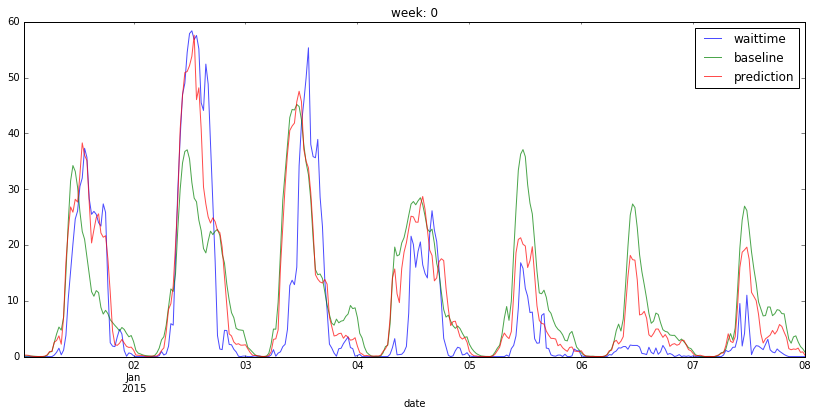

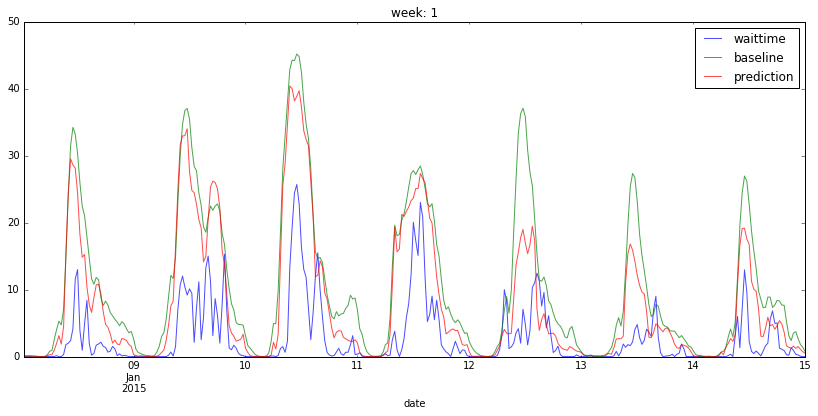

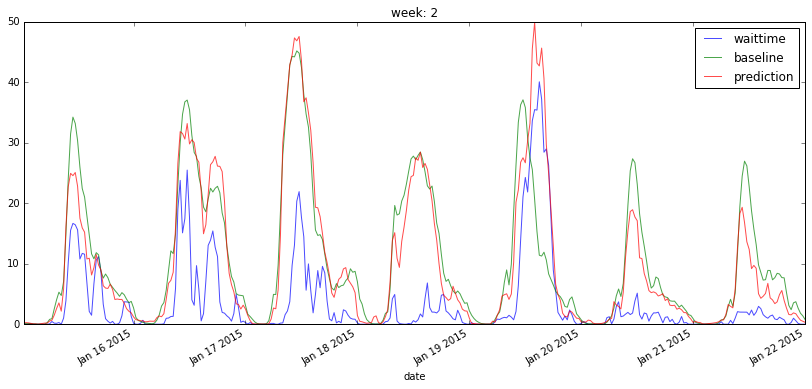

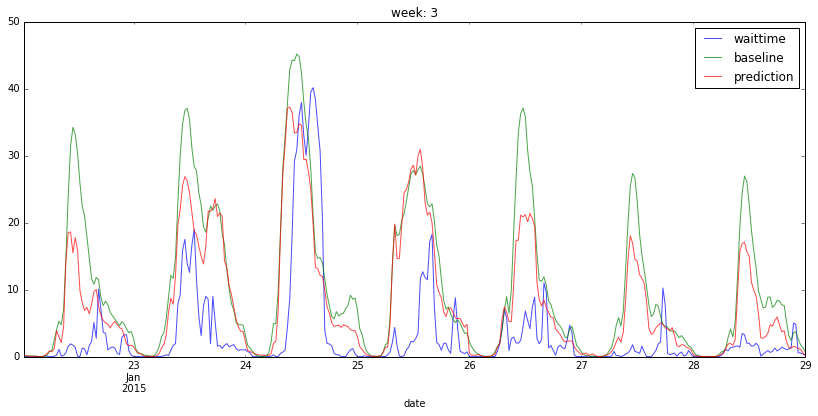

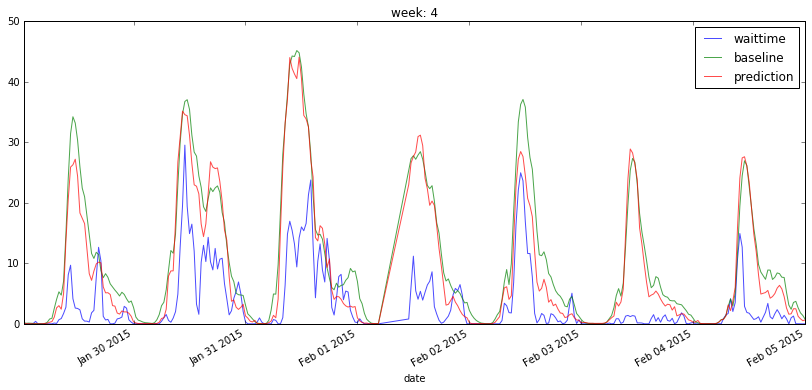

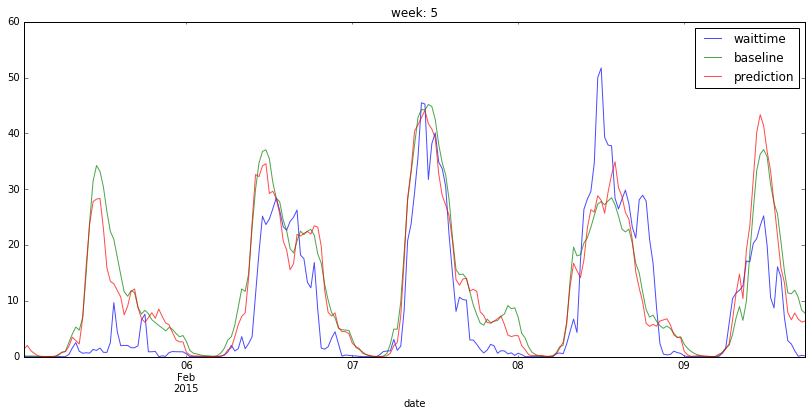

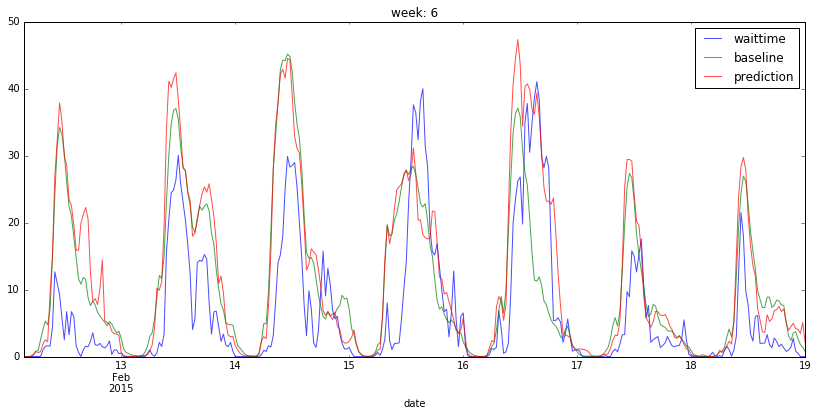

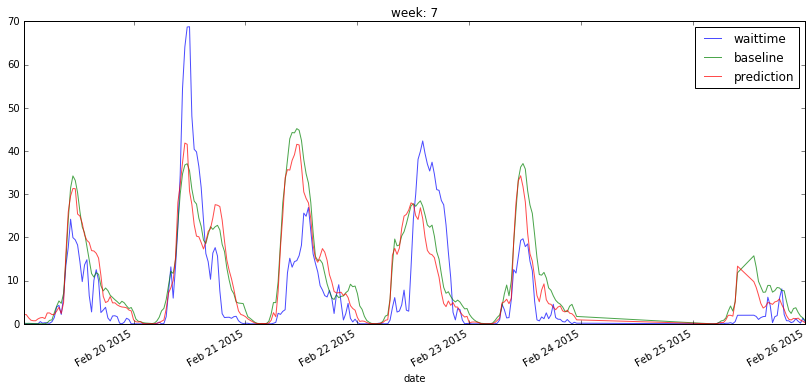

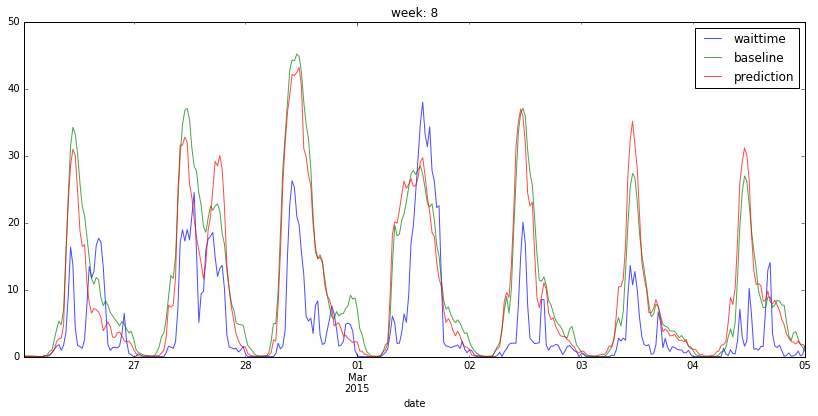

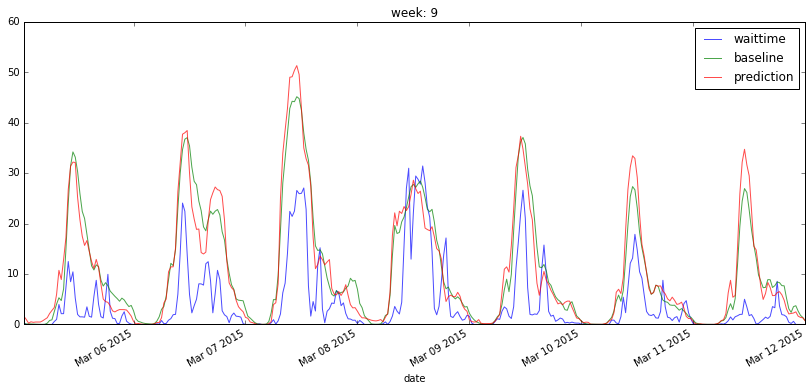

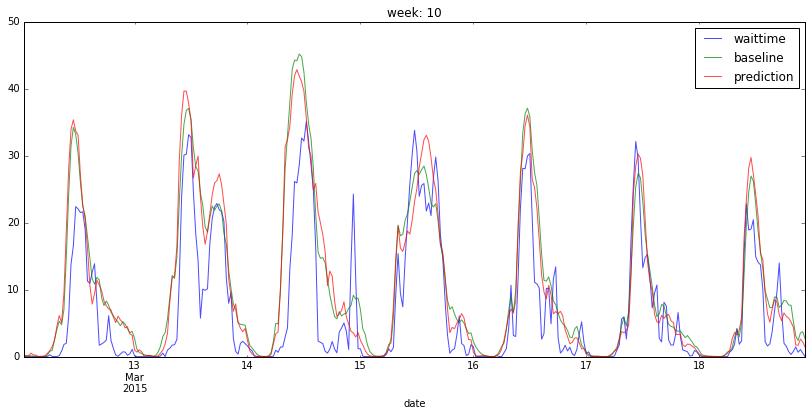

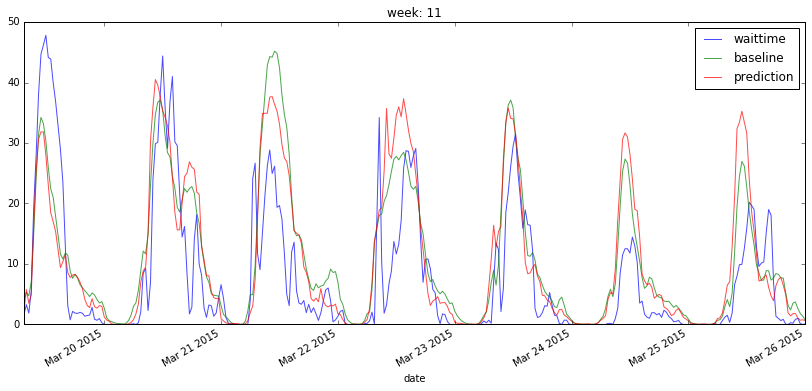

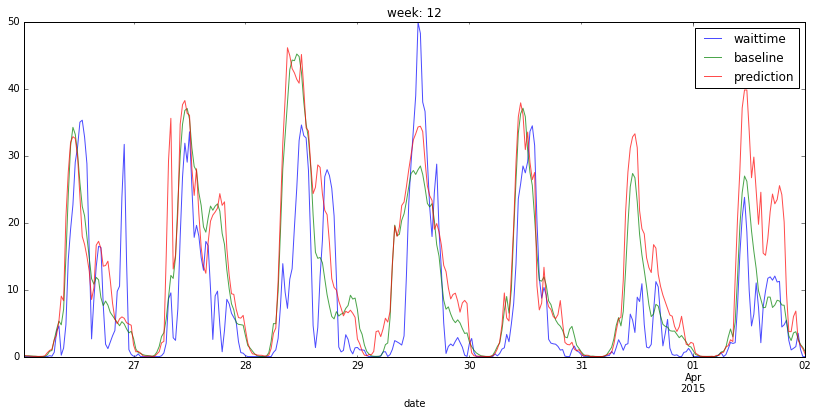

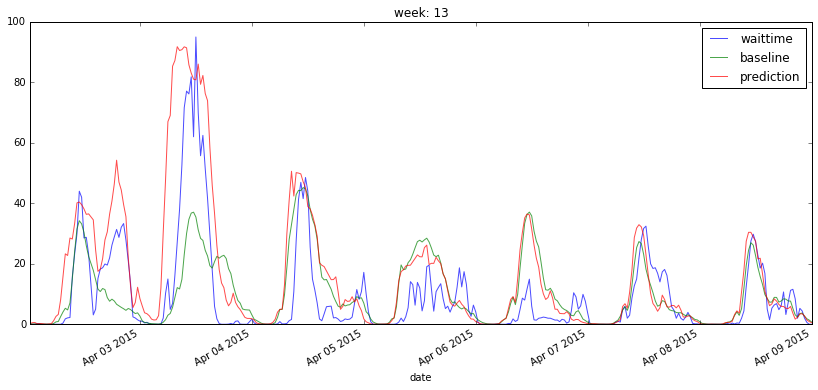

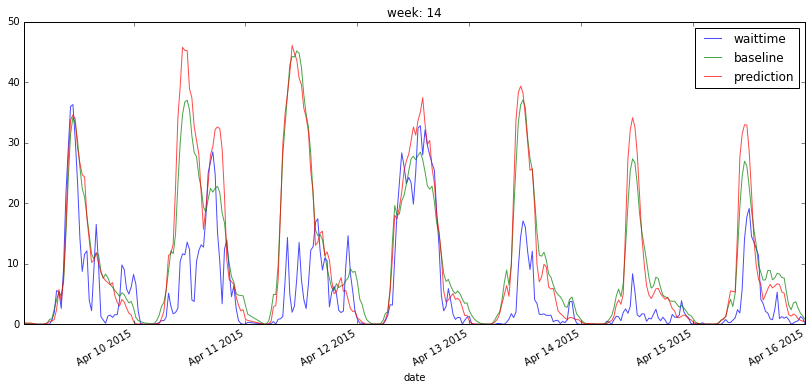

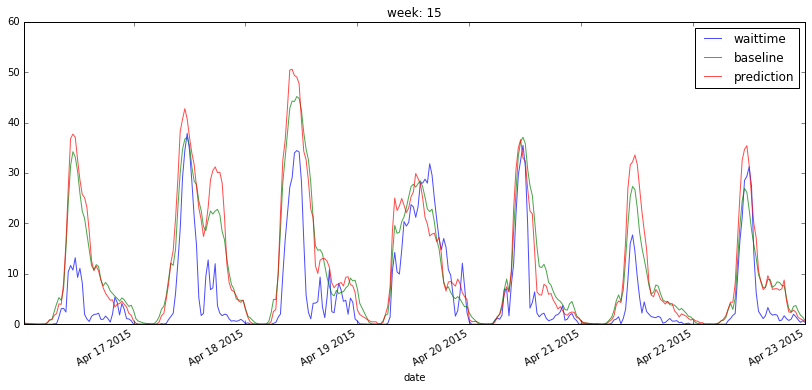

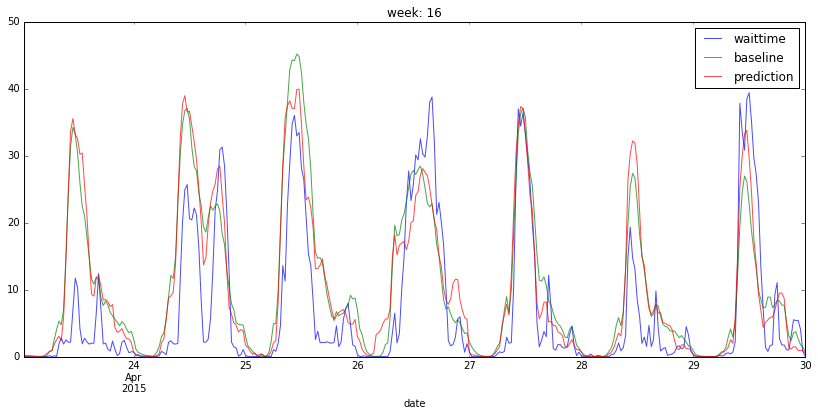

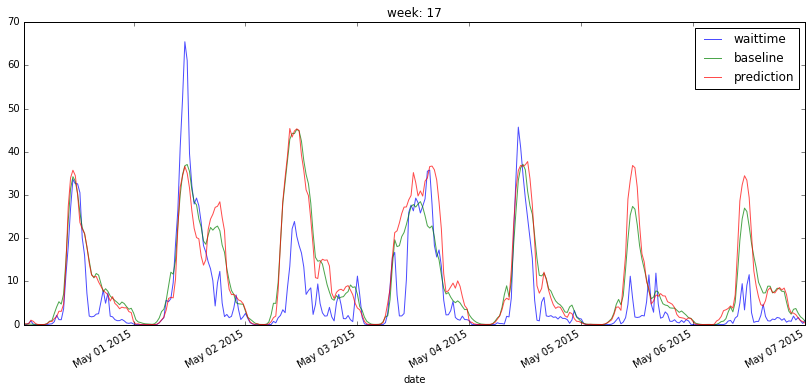

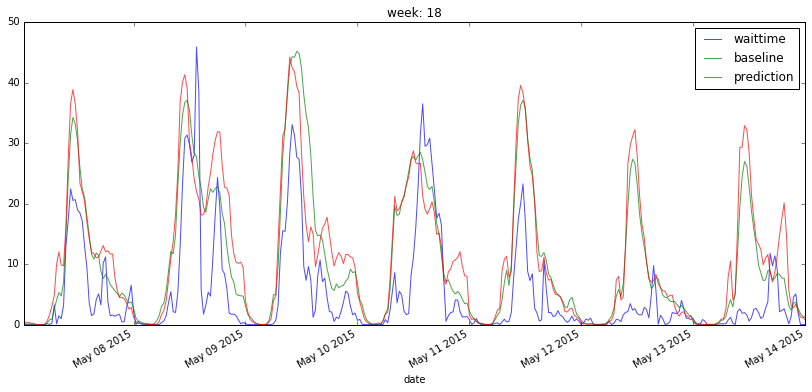

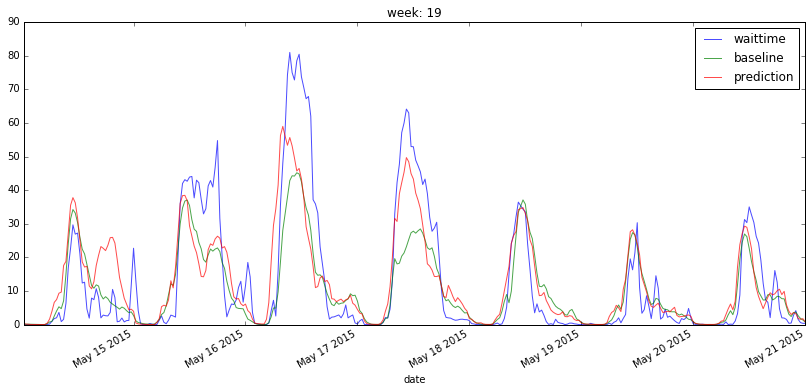

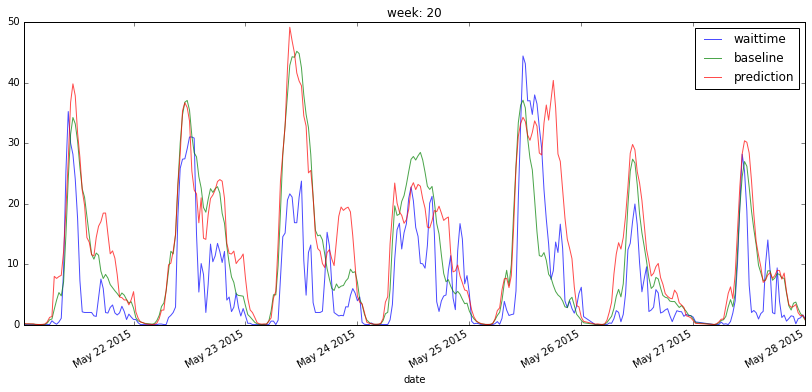

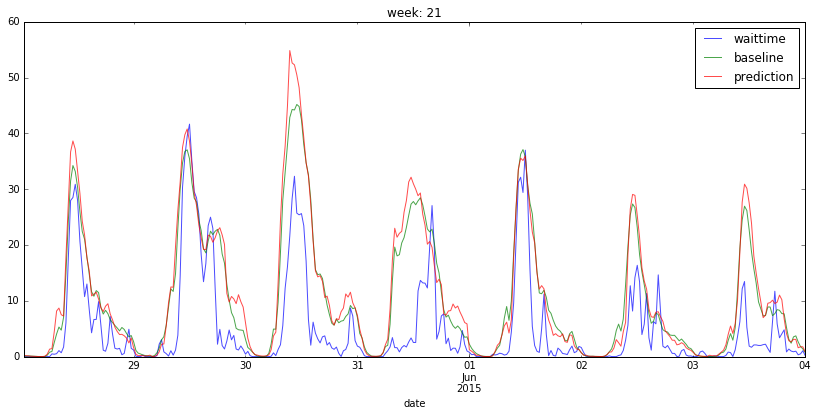

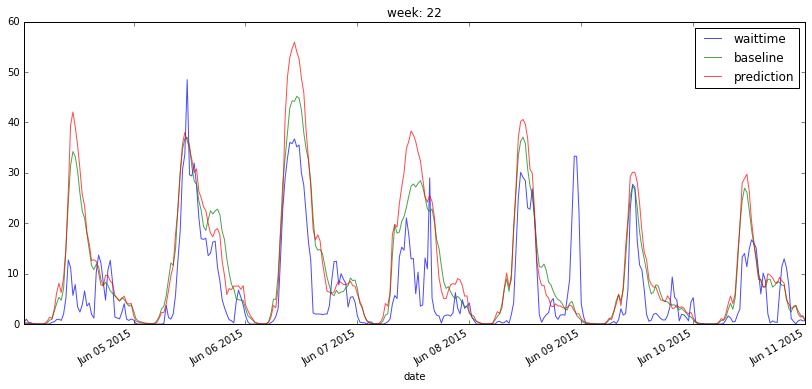

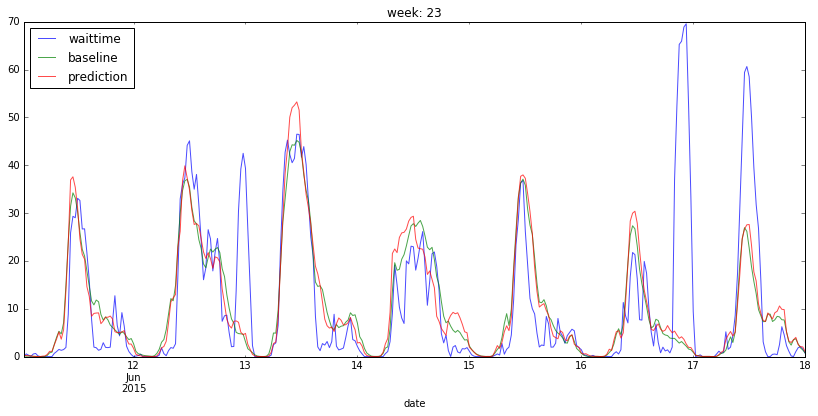

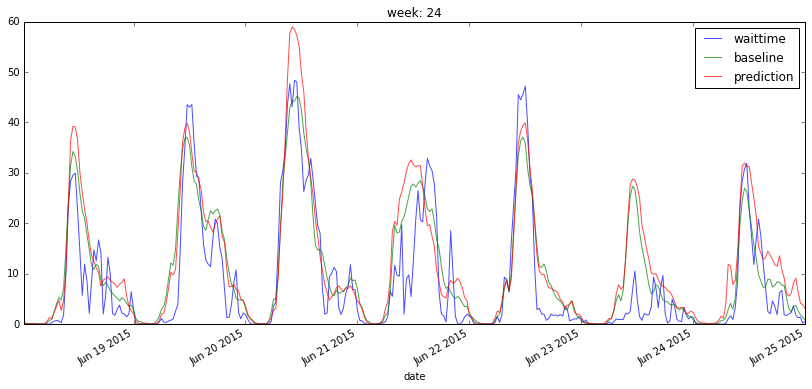

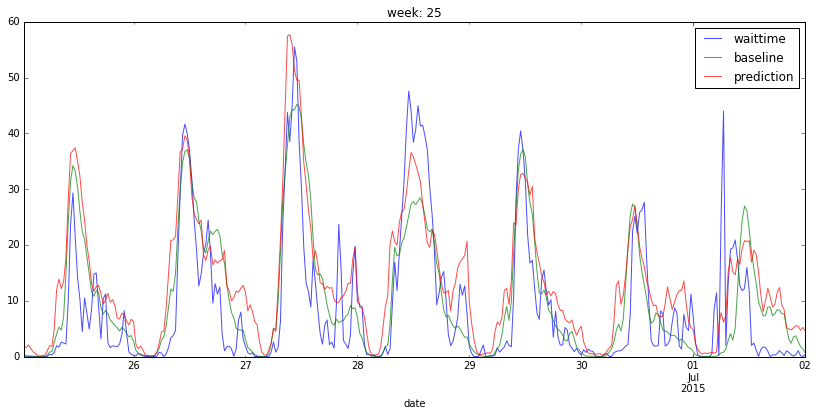

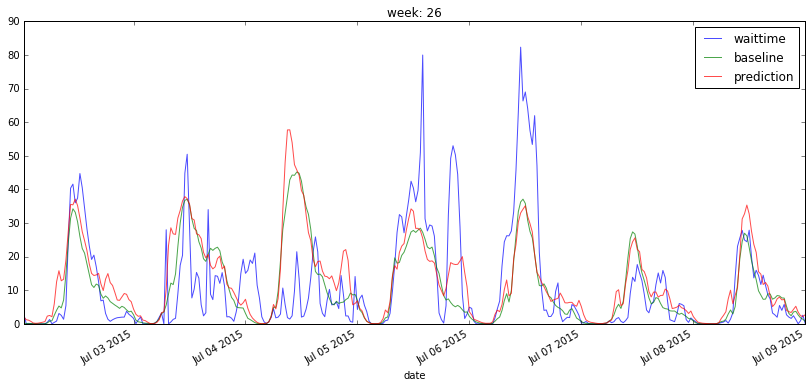

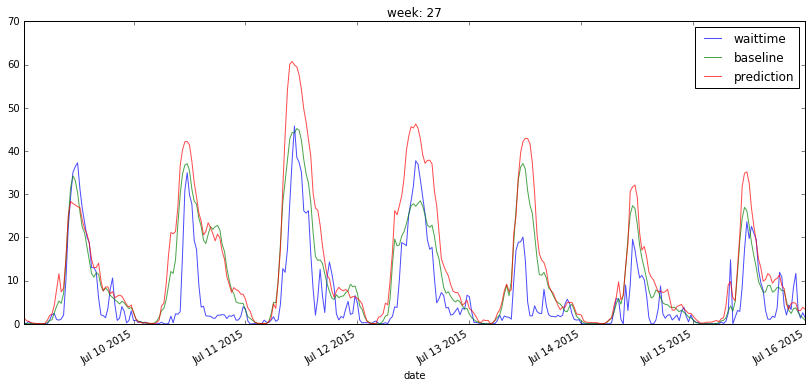

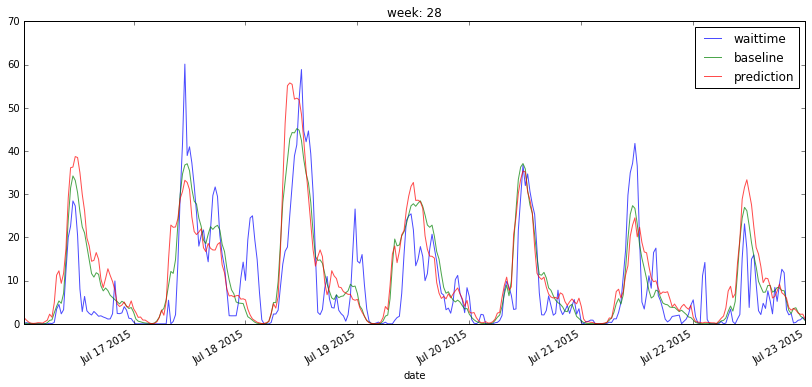

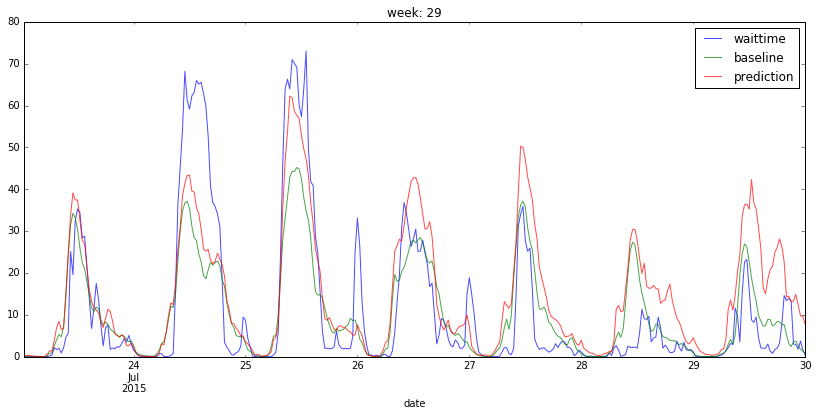

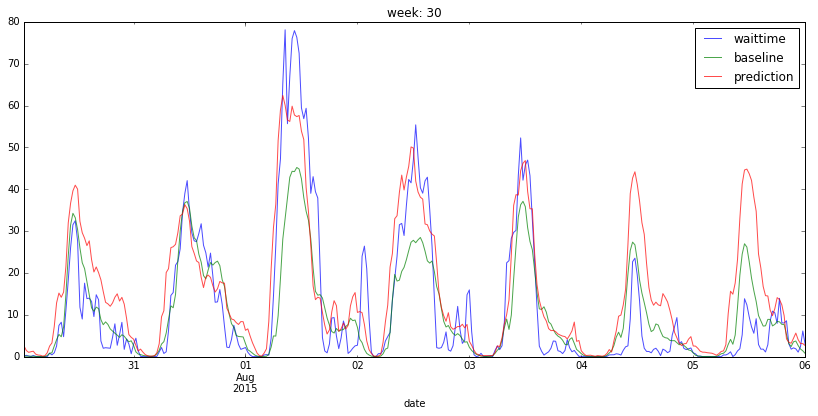

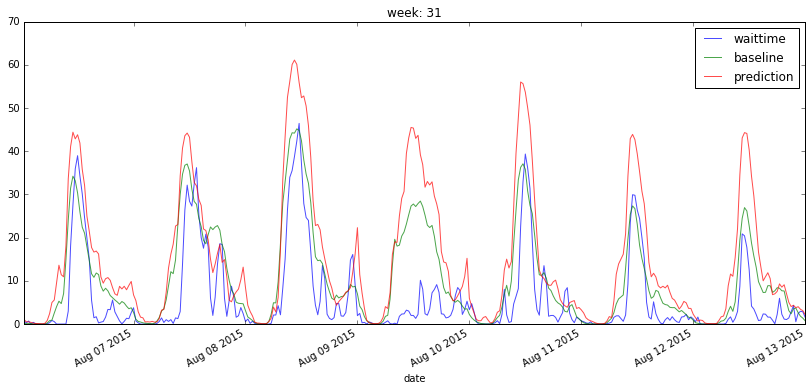

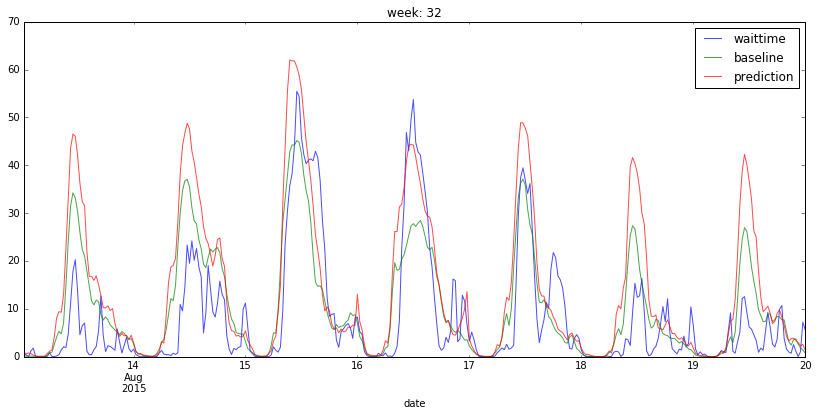

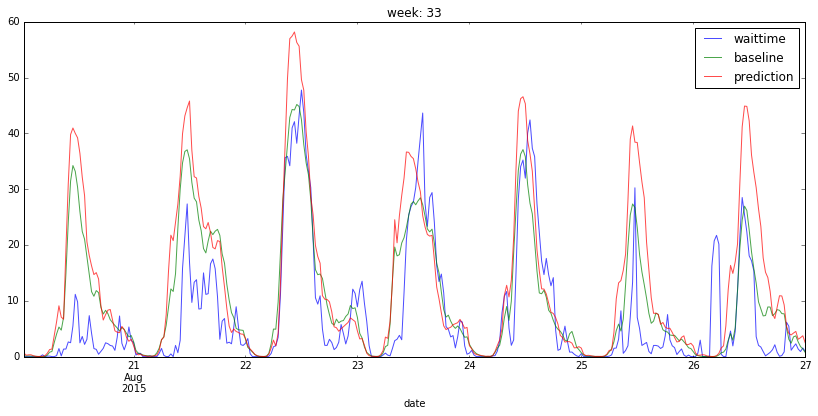

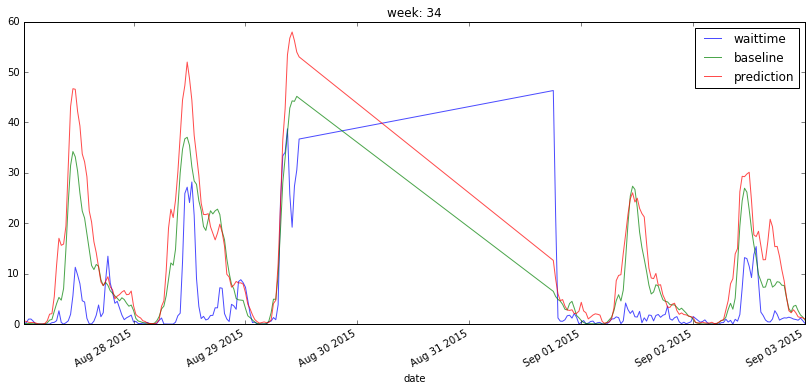

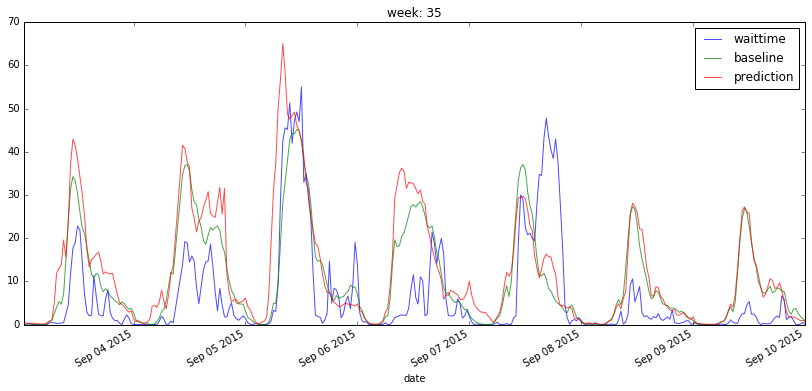

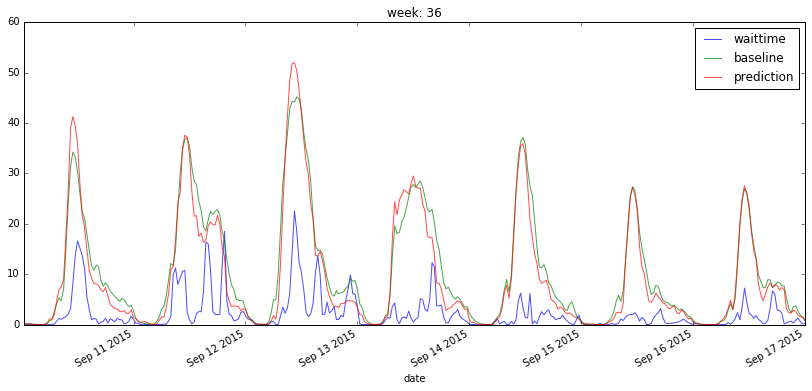

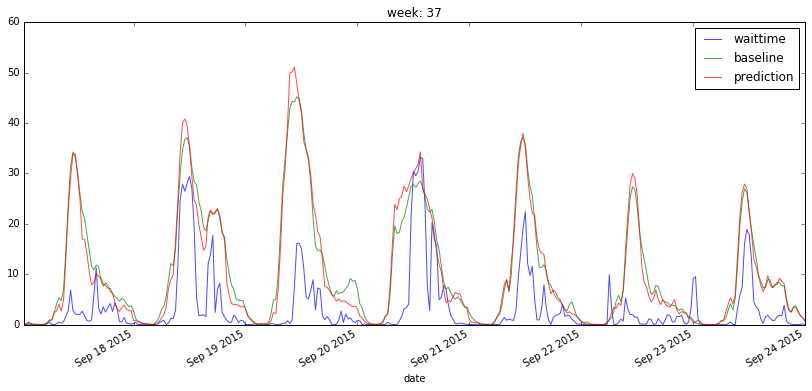

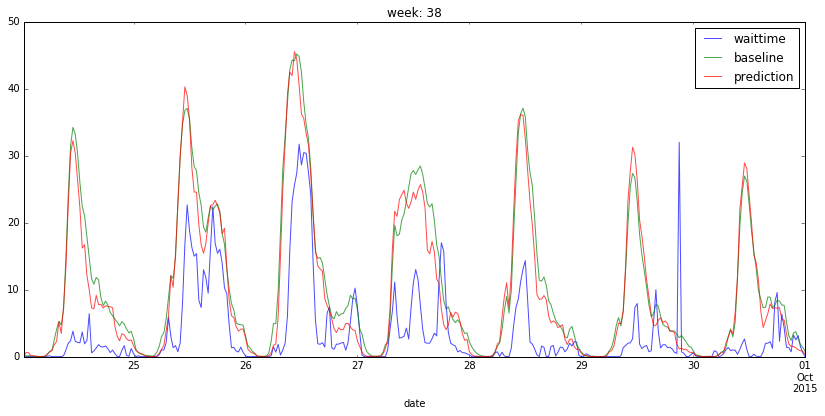

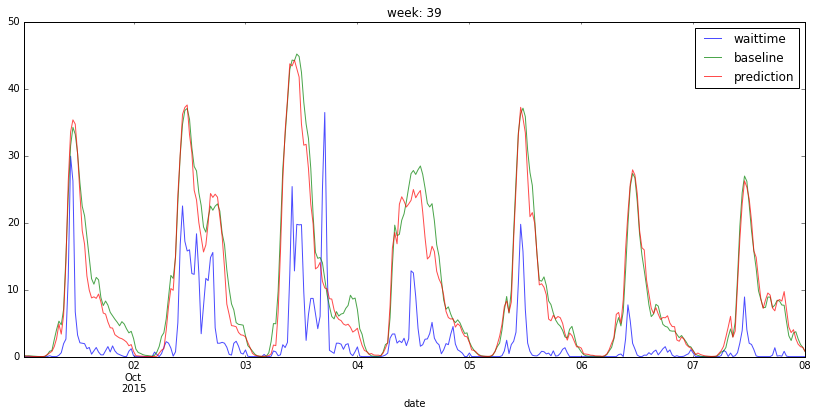

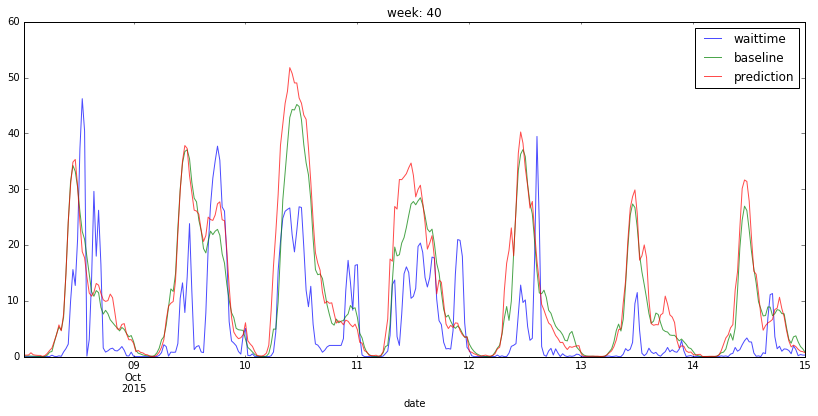

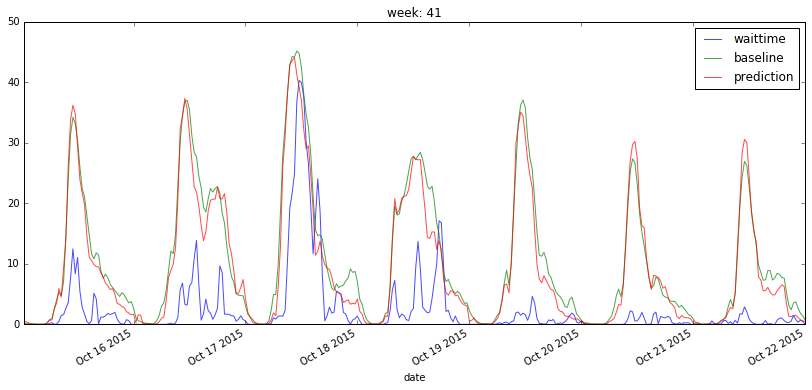

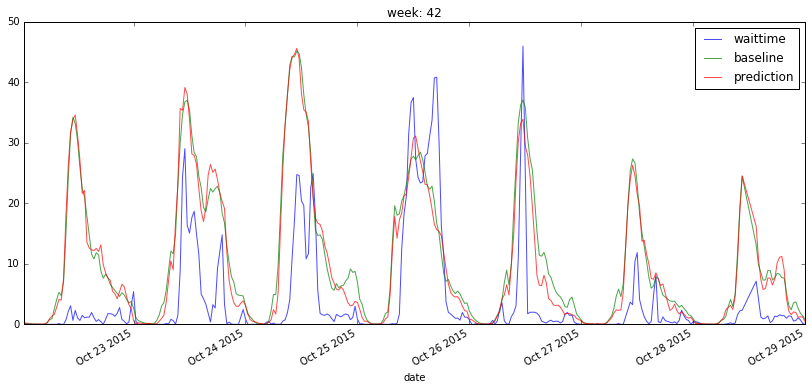

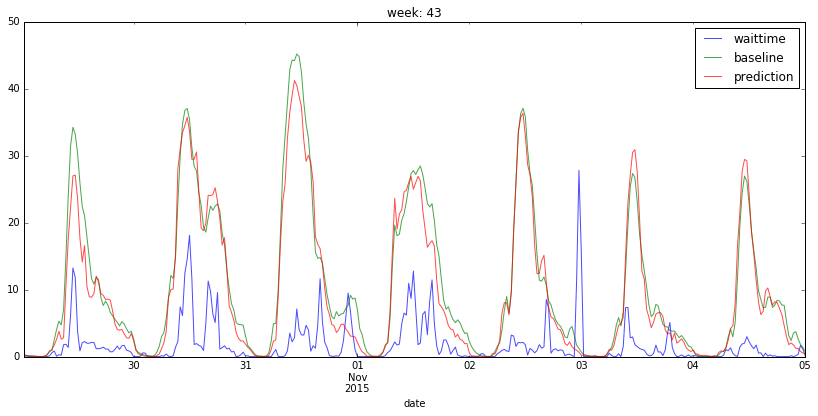

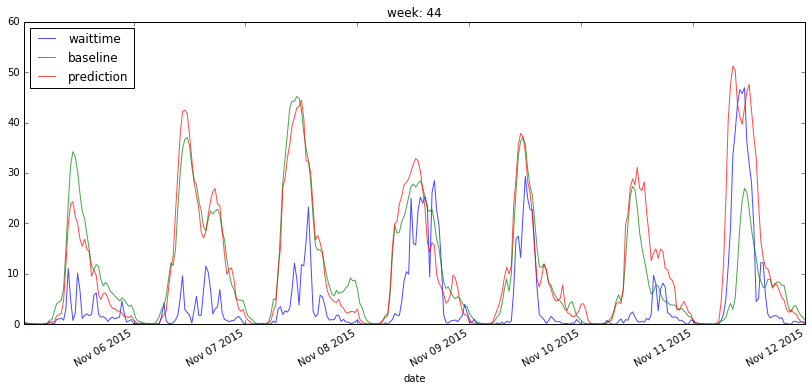

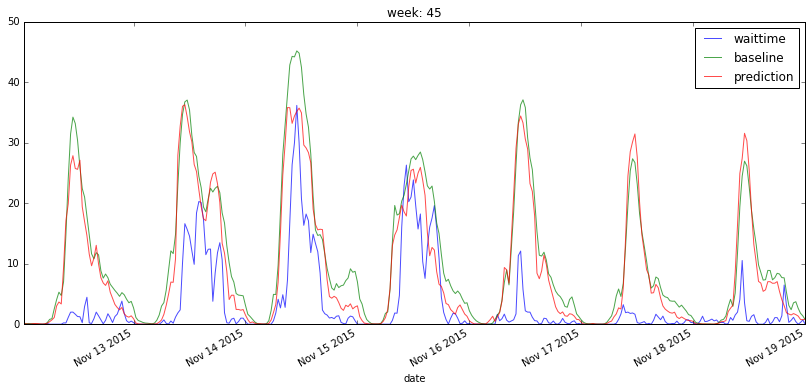

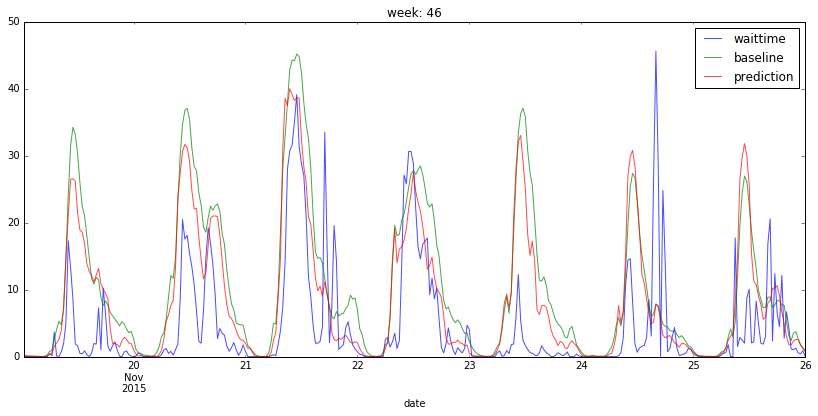

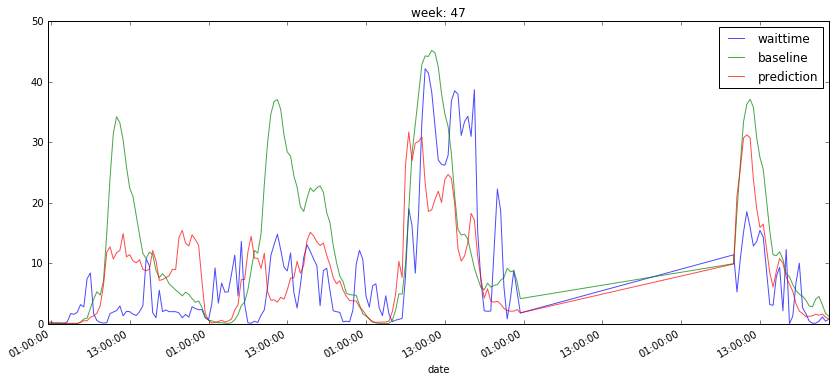

In [132]:
start = datetime.date(2015, 1, 1)
for i in range(48):
    end = start + datetime.timedelta(days=7)
    data.plot(str(start), str(end))
    plt.title('week: {0}'.format(i))
    
    
    start += datetime.timedelta(days=7)

## Calculate error by week

In [76]:
import copy
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score

In [147]:
baseline = copy.copy(data.baseline)
yhat = copy.copy(data.yhat)
actual = data.df.copy().reset_index()
actual = list(actual[actual.date >= '2015']['waittime'])

r2 = []
start = 0
for i in range(47):
    r2.append((r2_score(actual[start:start+336], baseline[start:start+336].values),
               r2_score(actual[start:start+336], yhat[start:start+336].values)))
    start += 336

r2 = np.array(r2)

plt.figure(figsize=(14,6))
plt.plot(range(47), r2[:,0], label='baseline')
plt.plot(range(47), r2[:,1], label='prediction')
plt.xlabel('Week')
plt.ylabel('R squared')
plt.legend(loc='lower left');

In [123]:
print r2_score(actual, baseline)

0.14722281598


In [124]:
print r2_score(actual, yhat)

0.0690758818599


In [149]:
r2[30:46]

array([[  0.24197659,  -1.22932736],
       [  0.5912261 ,   0.20643528],
       [  0.46534165,  -0.10778359],
       [ -0.43837849,  -2.04912283],
       [  0.14539113,  -0.17845663],
       [-13.17997711, -11.81581184],
       [ -1.92049167,  -1.96151588],
       [ -1.66804373,  -1.47053507],
       [ -2.01544042,  -1.6668473 ],
       [ -0.78334913,  -1.31178116],
       [ -3.20501311,  -2.84595697],
       [ -0.56985427,  -0.35490006],
       [-15.02019003, -12.8931068 ],
       [ -1.04011563,  -1.1930241 ],
       [ -1.79342968,  -1.2761553 ],
       [ -0.77948524,  -0.19558962]])

### Worst weeks
* Labor day
* Halloween?

* Overshoots 8/4 - 30

## Simple ensemble - average with baseline - IMPROVES model!  Harmonic mean is best.

In [136]:
average = (baseline + yhat) / 2.

In [137]:
print r2_score(actual, average)

0.16406220551


In [140]:
print r2_score(actual, np.sqrt(baseline * yhat))  # Geometric

0.178182750422


In [141]:
print r2_score(actual, 2 / (1/baseline + 1/yhat) )  # Harmonic

0.18558208105


In [143]:
print r2_score(actual, np.sqrt((baseline ** 2 + yhat ** 2) / 2 ))  # RMS

0.145102171048


In [145]:
print r2_score(actual, (baseline ** 2 + yhat ** 2) / (baseline + yhat) )  # Contraharmonic

0.117054556645


## Add Halloween, remove ca_thanksgiving, ca_family, day after us_thanksgiving

In [228]:
query = '''
        select 
            c.date,
            waittime,
            year,
            month,
            dayofweek,
            minofday,
            w.temp_max,
            w.temp_mean,
            w.temp_min,
            w.viz_max,
            w.wind_max,
            w.precip,
            w.rain,
            w.snow,
            w.fog,
            w.thunderstorm,
            wp1.temp_max as temp_max_p1,
            wp1.temp_mean as temp_mean_p1,
            wp1.temp_min as temp_min_p1,
            wp1.precip as precip_p1,
            wp1.rain as rain_p1,
            wp1.snow as snow_p1,
            wp1.thunderstorm as thunderstorm_p1,
            wp2.temp_max as temp_max_p2,
            wp2.temp_mean as temp_mean_p2,
            wp2.temp_min as temp_min_p2,
            wp2.precip as precip_p2,
            wp2.rain as rain_p2,
            wp2.snow as snow_p2,
            wp2.thunderstorm as thunderstorm_p2,
            wp3.temp_max as temp_max_p3,
            wp3.temp_mean as temp_mean_p3,
            wp3.temp_min as temp_min_p3,
            wp3.precip as precip_p3,
            wp3.rain as rain_p3,
            wp3.snow as snow_p3,
            wp3.thunderstorm as thunderstorm_p3,
            wm1.temp_max as temp_max_m1,
            wm1.temp_mean as temp_mean_m1,
            wm1.temp_min as temp_min_m1,
            wm1.precip as precip_m1,
            wm1.rain as rain_m1,
            wm1.snow as snow_m1,
            wm1.thunderstorm as thunderstorm_m1,
            wm2.temp_max as temp_max_m2,
            wm2.temp_mean as temp_mean_m2,
            wm2.temp_min as temp_min_m2,
            wm2.precip as precip_m2,
            wm2.rain as rain_m2,
            wm2.snow as snow_m2,
            wm2.thunderstorm as thunderstorm_m2,
            h.labor,
            h.newyears,
            h.us_mlk,
            h.us_washington,
            h.us_memorial,
            h.us_independence,
            h.us_columbus,
            h.us_veterans,
            h.us_thanksgiving,
            h.xmas,
            h.ca_goodfriday,
            h.ca_victoria,
            h.ca_canada,
            h.ca_civic,
            h.mothers,
            h.halloween,
            hp1.labor as labor_p1,
            hp1.newyears as newyears_p1,
            hp1.us_mlk as us_mlk_p1,
            hp1.us_washington as us_washington_p1,
            hp1.us_memorial as us_memorial_p1,
            hp1.us_independence as us_independence_p1,
            hp1.us_columbus as us_columbus_p1,
            hp1.us_veterans as us_veterans_p1,
            hp1.us_thanksgiving as us_thanksgiving_p1,
            hp1.xmas as xmas_p1,
            hp1.ca_goodfriday as ca_goodfriday_p1,
            hp1.ca_victoria as ca_victoria_p1,
            hp1.ca_canada as ca_canada_p1,
            hp1.ca_civic as ca_civic_p1,
            hp1.mothers as mothers_p1,
            hp1.halloween as halloween_p1,
            hm1.labor as labor_m1,
            hm1.newyears as newyears_m1,
            hm1.us_mlk as us_mlk_m1,
            hm1.us_washington as us_washington_m1,
            hm1.us_memorial as us_memorial_m1,
            hm1.us_independence as us_independence_m1,
            hm1.us_columbus as us_columbus_m1,
            hm1.us_veterans as us_veterans_m1,
            hm1.us_thanksgiving as us_thanksgiving_m1,
            hm1.xmas as xmas_m1,
            hm1.ca_goodfriday as ca_goodfriday_m1,
            hm1.ca_victoria as ca_victoria_m1,
            hm1.ca_canada as ca_canada_m1,
            hm1.ca_civic as ca_civic_m1,
            hm1.mothers as mothers_m1,
            hm1.halloween as halloween_m1,
            hp2.labor as labor_p2,
            hp2.newyears as newyears_p2,
            hp2.us_mlk as us_mlk_p2,
            hp2.us_washington as us_washington_p2,
            hp2.us_memorial as us_memorial_p2,
            hp2.us_independence as us_independence_p2,
            hp2.us_columbus as us_columbus_p2,
            hp2.us_veterans as us_veterans_p2,
            hp2.us_thanksgiving as us_thanksgiving_p2,
            hp2.xmas as xmas_p2,
            hp2.ca_goodfriday as ca_goodfriday_p2,
            hp2.ca_victoria as ca_victoria_p2,
            hp2.ca_canada as ca_canada_p2,
            hp2.ca_civic as ca_civic_p2,
            hp2.mothers as mothers_p2,
            hp2.halloween as halloween_p2,
            hm2.labor as labor_m2,
            hm2.newyears as newyears_m2,
            hm2.us_mlk as us_mlk_m2,
            hm2.us_washington as us_washington_m2,
            hm2.us_memorial as us_memorial_m2,
            hm2.us_independence as us_independence_m2,
            hm2.us_columbus as us_columbus_m2,
            hm2.us_veterans as us_veterans_m2,
            hm2.us_thanksgiving as us_thanksgiving_m2,
            hm2.xmas as xmas_m2,
            hm2.ca_goodfriday as ca_goodfriday_m2,
            hm2.ca_victoria as ca_victoria_m2,
            hm2.ca_canada as ca_canada_m2,
            hm2.ca_civic as ca_civic_m2,
            hm2.mothers as mothers_m2,
            hm2.halloween as halloween_m2,
            hp3.labor as labor_p3,
            hp3.newyears as newyears_p3,
            hp3.us_mlk as us_mlk_p3,
            hp3.us_washington as us_washington_p3,
            hp3.us_memorial as us_memorial_p3,
            hp3.us_independence as us_independence_p3,
            hp3.us_columbus as us_columbus_p3,
            hp3.us_veterans as us_veterans_p3,
            hp3.us_thanksgiving as us_thanksgiving_p3,
            hp3.xmas as xmas_p3,
            hp3.ca_goodfriday as ca_goodfriday_p3,
            hp3.ca_victoria as ca_victoria_p3,
            hp3.ca_canada as ca_canada_p3,
            hp3.ca_civic as ca_civic_p3,
            hp3.mothers as mothers_p3,
            hp3.halloween as halloween_p3,
            hm3.labor as labor_m3,
            hm3.newyears as newyears_m3,
            hm3.us_mlk as us_mlk_m3,
            hm3.us_washington as us_washington_m3,
            hm3.us_memorial as us_memorial_m3,
            hm3.us_independence as us_independence_m3,
            hm3.us_columbus as us_columbus_m3,
            hm3.us_veterans as us_veterans_m3,
            hm3.us_thanksgiving as us_thanksgiving_m3,
            hm3.xmas as xmas_m3,
            hm3.ca_goodfriday as ca_goodfriday_m3,
            hm3.ca_victoria as ca_victoria_m3,
            hm3.ca_canada as ca_canada_m3,
            hm3.ca_civic as ca_civic_m3,
            hm3.mothers as mothers_m3,
            hm3.halloween as halloween_m3,
            hp4.labor as labor_p4,
            hp4.newyears as newyears_p4,
            hp4.us_mlk as us_mlk_p4,
            hp4.us_washington as us_washington_p4,
            hp4.us_memorial as us_memorial_p4,
            hp4.us_independence as us_independence_p4,
            hp4.us_columbus as us_columbus_p4,
            hp4.us_veterans as us_veterans_p4,
            hp4.us_thanksgiving as us_thanksgiving_p4,
            hp4.xmas as xmas_p4,
            hp4.ca_goodfriday as ca_goodfriday_p4,
            hp4.ca_victoria as ca_victoria_p4,
            hp4.ca_canada as ca_canada_p4,
            hp4.ca_civic as ca_civic_p4,
            hp4.mothers as mothers_p4,
            hp4.halloween as halloween_p4,
            hm4.labor as labor_m4,
            hm4.newyears as newyears_m4,
            hm4.us_mlk as us_mlk_m4,
            hm4.us_washington as us_washington_m4,
            hm4.us_memorial as us_memorial_m4,
            hm4.us_independence as us_independence_m4,
            hm4.us_columbus as us_columbus_m4,
            hm4.us_veterans as us_veterans_m4,
            hm4.us_thanksgiving as us_thanksgiving_m4,
            hm4.xmas as xmas_m4,
            hm4.ca_goodfriday as ca_goodfriday_m4,
            hm4.ca_victoria as ca_victoria_m4,
            hm4.ca_canada as ca_canada_m4,
            hm4.ca_civic as ca_civic_m4,
            hm4.mothers as mothers_m4,
            hm4.halloween as halloween_m4,
            hp5.labor as labor_p5,
            hp5.newyears as newyears_p5,
            hp5.us_mlk as us_mlk_p5,
            hp5.us_washington as us_washington_p5,
            hp5.us_memorial as us_memorial_p5,
            hp5.us_independence as us_independence_p5,
            hp5.us_columbus as us_columbus_p5,
            hp5.us_veterans as us_veterans_p5,
            hp5.us_thanksgiving as us_thanksgiving_p5,
            hp5.xmas as xmas_p5,
            hp5.ca_goodfriday as ca_goodfriday_p5,
            hp5.ca_victoria as ca_victoria_p5,
            hp5.ca_canada as ca_canada_p5,
            hp5.ca_civic as ca_civic_p5,
            hp5.mothers as mothers_p5,
            hp5.halloween as halloween_p5,
            hm5.labor as labor_m5,
            hm5.newyears as newyears_m5,
            hm5.us_mlk as us_mlk_m5,
            hm5.us_washington as us_washington_m5,
            hm5.us_memorial as us_memorial_m5,
            hm5.us_independence as us_independence_m5,
            hm5.us_columbus as us_columbus_m5,
            hm5.us_veterans as us_veterans_m5,
            hm5.us_thanksgiving as us_thanksgiving_m5,
            hm5.xmas as xmas_m5,
            hm5.ca_goodfriday as ca_goodfriday_m5,
            hm5.ca_victoria as ca_victoria_m5,
            hm5.ca_canada as ca_canada_m5,
            hm5.ca_civic as ca_civic_m5,
            hm5.mothers as mothers_m5,
            hm5.halloween as halloween_m5,
            hp6.labor as labor_p6,
            hp6.newyears as newyears_p6,
            hp6.us_mlk as us_mlk_p6,
            hp6.us_washington as us_washington_p6,
            hp6.us_memorial as us_memorial_p6,
            hp6.us_independence as us_independence_p6,
            hp6.us_columbus as us_columbus_p6,
            hp6.us_veterans as us_veterans_p6,
            hp6.us_thanksgiving as us_thanksgiving_p6,
            hp6.xmas as xmas_p6,
            hp6.ca_goodfriday as ca_goodfriday_p6,
            hp6.ca_victoria as ca_victoria_p6,
            hp6.ca_canada as ca_canada_p6,
            hp6.ca_civic as ca_civic_p6,
            hp6.mothers as mothers_p6,
            hp6.halloween as halloween_p6,
            hp7.labor as labor_p7,
            hp7.newyears as newyears_p7,
            hp7.us_mlk as us_mlk_p7,
            hp7.us_washington as us_washington_p7,
            hp7.us_memorial as us_memorial_p7,
            hp7.us_independence as us_independence_p7,
            hp7.us_columbus as us_columbus_p7,
            hp7.us_veterans as us_veterans_p7,
            hp7.us_thanksgiving as us_thanksgiving_p7,
            hp7.xmas as xmas_p7,
            hp7.ca_goodfriday as ca_goodfriday_p7,
            hp7.ca_victoria as ca_victoria_p7,
            hp7.ca_canada as ca_canada_p7,
            hp7.ca_civic as ca_civic_p7,
            hp7.mothers as mothers_p7
        from mungedata c
        join datefeatures d on c.date = d.date
        left join publicholiday h on c.date::timestamp::date = h.date
        left join publicholiday hp1 on c.date::timestamp::date = hp1.date - interval '1 day'
        left join publicholiday hm1 on c.date::timestamp::date = hm1.date + interval '1 day'
        left join publicholiday hp2 on c.date::timestamp::date = hp2.date - interval '2 day'
        left join publicholiday hm2 on c.date::timestamp::date = hm2.date + interval '2 day'
        left join publicholiday hp3 on c.date::timestamp::date = hp3.date - interval '3 day'
        left join publicholiday hm3 on c.date::timestamp::date = hm3.date + interval '3 day'
        left join publicholiday hp4 on c.date::timestamp::date = hp4.date - interval '4 day'
        left join publicholiday hm4 on c.date::timestamp::date = hm4.date + interval '4 day'
        left join publicholiday hp5 on c.date::timestamp::date = hp5.date - interval '5 day'
        left join publicholiday hm5 on c.date::timestamp::date = hm5.date + interval '5 day'
        left join publicholiday hp6 on c.date::timestamp::date = hp6.date - interval '6 day'
        left join publicholiday hp7 on c.date::timestamp::date = hp7.date - interval '7 day'
        left join weather w on c.date::timestamp::date = w.date
        left join weather wp1 on c.date::timestamp::date = wp1.date - interval '1 day'
        left join weather wp2 on c.date::timestamp::date = wp2.date - interval '2 day'
        left join weather wp3 on c.date::timestamp::date = wp3.date - interval '3 day'
        left join weather wm1 on c.date::timestamp::date = wm1.date + interval '1 day'
        left join weather wm2 on c.date::timestamp::date = wm2.date + interval '2 day'
        where
            crossing_id = 1
            and c.date >= '2008-1-1'
            and munger_id = 2
            and (minute = 0 or minute = 30)
        order by c.date;
        '''

df = pd_query(query)

In [229]:
data = BorderData(df)

model = ExtraTreesRegressor(n_jobs=-1, n_estimators=100, bootstrap=True, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)
data.predict(grid)
data.print_metrics(grid)

OOB:  0.910475614768
Best score:  0.396198481881
** MSE for last cv fold **
Baseline :  96.7590735774
Model    :  106.407608432
** R^2 for last cv fold **
Baseline :  0.14722281598
Model    :  0.0621863426147
** Explained variance for last cv fold **
Baseline :  0.304333505904
Model    :  0.278117338459


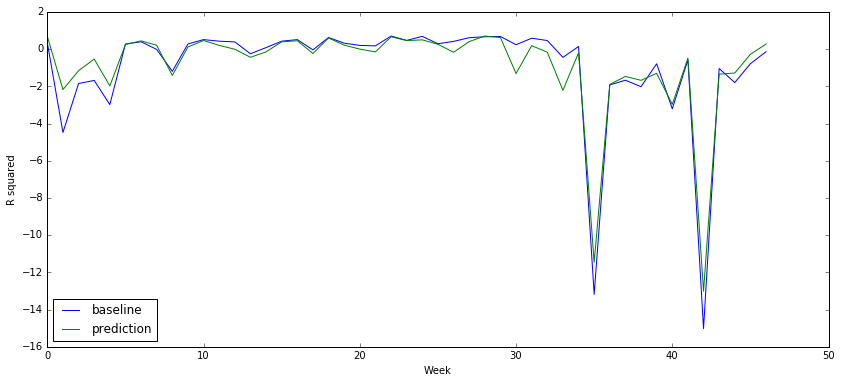

In [230]:
baseline = copy.copy(data.baseline)
yhat = copy.copy(data.yhat)
actual = data.df.copy().reset_index()
actual = list(actual[actual.date >= '2015']['waittime'])

r2 = []
start = 0
for i in range(47):
    r2.append((r2_score(actual[start:start+336], baseline[start:start+336].values),
               r2_score(actual[start:start+336], yhat[start:start+336].values)))
    start += 336

r2 = np.array(r2)

plt.figure(figsize=(14,6))
plt.plot(range(47), r2[:,0], label='baseline')
plt.plot(range(47), r2[:,1], label='prediction')
plt.xlabel('Week')
plt.ylabel('R squared')
plt.legend(loc='lower left');

In [231]:
print data.X.columns.values[np.argsort(grid.best_estimator_.feature_importances_)[::-1]]
print sorted(grid.best_estimator_.feature_importances_)[::-1]

['minofday' 'dayofweek' 'year' 'month' 'temp_min_m2' 'ca_goodfriday'
 'wind_max' 'temp_mean_m2' 'temp_min_m1' 'temp_mean_p2' 'temp_min'
 'temp_mean_p1' 'temp_max' 'temp_mean' 'temp_min_p1' 'temp_min_p2'
 'temp_mean_m1' 'temp_max_p1' 'temp_max_p2' 'temp_max_m2' 'temp_min_p3'
 'temp_max_m1' 'temp_max_p3' 'temp_mean_p3' 'precip_p1' 'precip_m2'
 'precip_p3' 'precip' 'precip_p2' 'precip_m1' 'rain_p3' 'rain_m2' 'rain_p1'
 'rain' 'rain_m1' 'rain_p2' 'us_veterans' 'fog' 'newyears_m1'
 'ca_victoria_p2' 'ca_goodfriday_p1' 'us_memorial' 'ca_victoria_p1'
 'us_columbus_p2' 'us_washington' 'xmas_m2' 'us_washington_p1'
 'ca_goodfriday_m1' 'newyears_p3' 'newyears_p2' 'newyears_p5' 'xmas_m4'
 'ca_civic_p2' 'labor_p7' 'xmas_m5' 'xmas_m3' 'newyears_p4' 'viz_max'
 'newyears' 'us_thanksgiving_m1' 'us_columbus_p1' 'snow_p3'
 'us_thanksgiving_m3' 'snow_p2' 'ca_civic_p1' 'ca_civic_p5' 'us_mlk'
 'newyears_m2' 'labor_p2' 'snow_m2' 'us_thanksgiving' 'us_veterans_p4'
 'snow' 'snow_m1' 'us_thanksgiving_m2' 'us_vet

## Holiday weighted ensembling
* Add a weight for holidays with lag & lead
* Assume integer weighting, e.g. wy weight on yhat and wb weight on baseline, then a geometric mean would look like (yhat^wy * baseline^wb)^1/(wy + wb)

Starting values
* wb = 2 default
* wy = 4 for holiday ranges; wy = 1 for non-holiday ranges

In [232]:
query = '''
        select 
            d.date::timestamp::date as dt,
            h.*
        from datefeatures d
        left join publicholiday h on d.date::timestamp::date = h.date
        where
            hour = 0
            and minute = 0 
        order by d.date;
        '''

hdf = pd_query(query)
hdf = hdf.drop('date', 1).set_index('dt')

In [233]:
hdf['weight'] = (np.convolve(hdf.sum(1), [1,2,2,3,3,2,2,1])+1)[:len(hdf)]

In [234]:
hdf.head()

newyears  labor us_mlk us_washington us_memorial us_independence  \
dt                                                                            
2007-01-01     True  False  False         False       False           False   
2007-01-02    False  False  False         False       False           False   
2007-01-03    False  False  False         False       False           False   
2007-01-04    False  False  False         False       False           False   
2007-01-05    False  False  False         False       False           False   

           us_columbus us_veterans us_thanksgiving   xmas ca_goodfriday  \
dt                                                                        
2007-01-01       False       False           False  False         False   
2007-01-02       False       False           False  False         False   
2007-01-03       False       False           False  False         False   
2007-01-04       False       False           False  False         False   
2007-01-05       False       False           False  False         False   

           ca_victoria ca_canada ca_civic ca_thanksgiving ca_family mothers  \
dt                                                                            
2007-01-01       False     False    False           False     False   False   
2007-01-02       False     False    False           False     False   False   
2007-01-03       False     False    False           False     False   False   
2007-01-04       False     False    False           False     False   False   
2007-01-05       False     False    False           False     False   False   

           halloween  weight  
dt                            
2007-01-01     False       2  
2007-01-02     False       3  
2007-01-03     False       3  
2007-01-04     False       4  
2007-01-05     False       4

In [235]:
weight = hdf[(hdf.index >= datetime.date(2015,1,1)) & 
    (hdf.index <= data.date.values[-1].astype('M8[D]').astype('O'))].weight

In [236]:
print len(weight)
print len(data.yhat)

334
15585


In [244]:
weight[weight > 4]  # due to Canada day and 4th of July proximaty

dt
2015-07-04    5
2015-07-05    6
2015-07-06    5
2015-07-07    6
2015-07-08    5
Name: weight, dtype: float64

In [259]:
predict = pd.DataFrame(data.yhat)

In [260]:
predict.head()

prediction
date                           
2015-01-01 00:00:00    0.929879
2015-01-01 00:30:00    0.236502
2015-01-01 01:00:00    0.300983
2015-01-01 01:30:00    0.113105
2015-01-01 02:00:00    0.163478

In [273]:
predict['dt'] = predict.index.date

In [278]:
predict.head()

prediction          dt
date                                       
2015-01-01 00:00:00    0.929879  2015-01-01
2015-01-01 00:30:00    0.236502  2015-01-01
2015-01-01 01:00:00    0.300983  2015-01-01
2015-01-01 01:30:00    0.113105  2015-01-01
2015-01-01 02:00:00    0.163478  2015-01-01

In [282]:
predict = predict.merge(pd.DataFrame(weight), how='left', left_on='dt', right_index=True)

In [283]:
predict.head()

prediction          dt  weight
date                                               
2015-01-01 00:00:00    0.929879  2015-01-01       3
2015-01-01 00:30:00    0.236502  2015-01-01       3
2015-01-01 01:00:00    0.300983  2015-01-01       3
2015-01-01 01:30:00    0.113105  2015-01-01       3
2015-01-01 02:00:00    0.163478  2015-01-01       3

In [290]:
print len(data.y_test)
print len(predict)
print len(data.baseline)

15585
15585
15585


#### Arithmetic mean

In [318]:
mean_arith = (predict.prediction * predict.weight + data.baseline * 3) / (predict.weight + 3)
r2_score(data.y_test, mean_arith)

0.1741069486811514

#### Geometric mean

In [312]:
mean_geo = (predict.prediction ** predict.weight * data.baseline ** 2.5) \
    ** (1/(predict.weight + 2.5))
r2_score(data.y_test, mean_geo)

0.18319691749563272

#### Harmonic mean - improved from .185

In [308]:
mean_har = (predict.weight + 2.5) / ( predict.weight / predict.prediction + 2.5 / data.baseline )
r2_score(data.y_test, mean_har)

0.18909408868455524

### Plot r2 by day

In [364]:
predict['baseline'] = data.baseline
predict['y_test'] = data.y_test

In [363]:
predict['mean'] = mean_har

In [368]:
r2 = predict.groupby(predict.index.date).apply(lambda x: r2_score(x['y_test'], x['mean']))

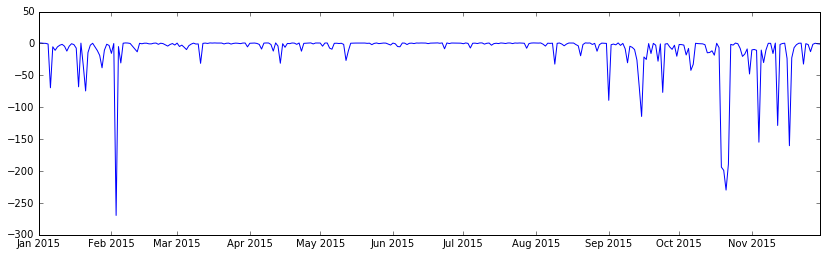

In [370]:
plt.figure(figsize=(14,4))
plt.plot(r2);

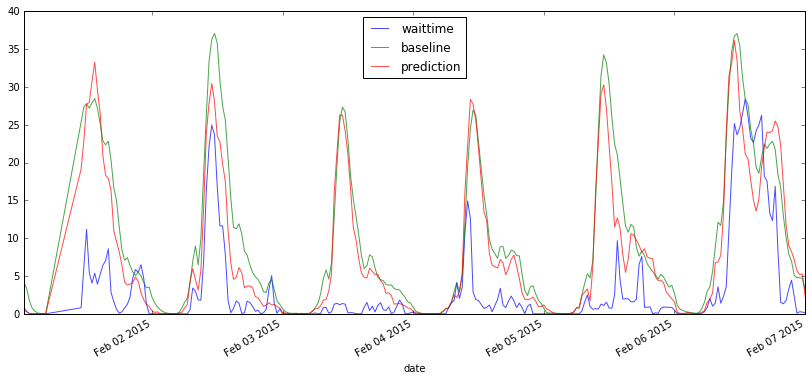

In [381]:
data.plot('2/1/15', '2/7/15');